In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

In [3]:
team_v_team_stats_df = Local.get_team_v_team_stats_dataframe('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [4]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [5]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [6]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [7]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [8]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [9]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [10]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [11]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [12]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  ...  PPG_total_away  \
0                0.000000           0.000000  ...        0.000000   
1                0.000000           0.000000  ...        0.000000   
2                0.000000           0.000000  ...        0.000000   
3                0.000000           0.000000  ...        0.000000   
4                0.000000           0.000000  ...        0.000000   
...                   ...                ...  ...             ...   
23515            0.353000           0.691000  ...       92.000000   
23516            0.383000           0.619000  ...      108.000000   
23517            0.329333           0.704667  ...      111.333333   
23518            0.321500           0.704500  ...       93.333333   
23519            0.305333           0.758000  ...      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
0               0.000000            0.000000           0.000000   
1               0.000000            0.000000           0.000000   
2               0.000000            0.000000           0.000000   
3               0.000000            0.000000           0.000000   
4               0.000000            0.000000           0.000000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  \
0            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
1            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
2            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
3            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
4            0.000000        0.000000  1.610613e+09  1.610613e+09    0.000000   
...               ...             ...           ...           ...         ...   
23515       26.000000       35.000000  1.610613e+09  1.610613e+09    0.000000   
23516       23.000000       42.000000  1.610613e+09  1.610613e+09    1.000000   
23517       24.000000       56.000000  1

In [13]:
team_v_team_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23511  2020-12-18  12000044            1    2020                  1   
23516  2020-12-18  12000039            1    2020                  0   
23518  2020-12-19  12000048            1    2020                  1   
23517  2020-12-19  12000049            1    2020                  1   
23519  2020-12-19  12000047            1    2020                  1   

       GAMES_PLAYED_away  FG3_PCT_total_home  PPG_total_home  \
0                      0               0.000             0.0   
1                      0               0.000             0.0   
2                      0               0.000             0.0   
3                      0               0.000             0.0   
4                      0               0.000             0.0   
...                  ...                 ...             ...   
23511                  1               0.324           103.0   
23516                  0               0.000             0.0   
23518                  1               0.265            86.0   
23517                  1               0.380           128.0   
23519                  1               0.324           115.0   

       FG_PCT_total_home  RPG_total_home  ...  FG3_PCT_total_away  \
0                  0.000             0.0  ...               0.000   
1                  0.000             0.0  ...               0.000   
2                  0.000             0.0  ...               0.000   
3                  0.000             0.0  ...               0.000   
4                  0.000             0.0  ...               0.000   
...                  ...             ...  ...                 ...   
23511              0.381            46.0  ...               0.333   
23516              0.000             0.0  ...               0.000   
23518              0.397            42.0  ...               0.400   
23517              0.474            58.0  ...               0.289   
23519              0.474            53.0  ...               0.439   

       PPG_total_away  FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  \
0                 0.0              0.000             0.0              0.000   
1                 0.0              0.000             0.0              0.000   
2                 0.0              0.000             0.0              0.000   
3                 0.0              0.000             0.0              0.000   
4                 0.0              0.000             0.0              0.000   
...               ...                ...             ...                ...   
23511           124.0              0.542            61.0              0.643   
23516             0.0              0.000             0.0              0.000   
23518            97.0              0.494            42.0              0.583   
23517           106.0              0.381            46.0              0.864   
23519           123.0              0.475            43.0              0.900   

       APG_total_away  TEAM_ID_away  TEAM_ID_home  W_PCT_away  W_PCT_home  
0                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
1                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
2                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
3                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
4                 0.0  1.610613e+09  1.610613e+09         0.0         0.0  
...               ...           ...           ...         ...         ...  
23511            26.0  1.610613e+09  1.610613e+09         1.0         0.0  
23516

## Attach target columns to dataset

In [14]:
team_v_team_stats_copy_df = team_v_team_stats_df.copy()
team_v_team_stats_copy_df['home_win'] = winners_df
team_v_team_stats_copy_df['greater_fgp'] = greater_fgp_df
team_v_team_stats_copy_df['greater_fg3'] = greater_fg3_df
team_v_team_stats_copy_df['greater_ft'] = greater_ft_df
team_v_team_stats_copy_df['greater_ast'] = greater_ast_df
team_v_team_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [15]:
team_v_team_stats_copy_df = team_v_team_stats_copy_df[(team_v_team_stats_copy_df['GAMES_PLAYED_home']>0) & (team_v_team_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = team_v_team_stats_copy_df['home_win']
greater_fgp_df = team_v_team_stats_copy_df['greater_fgp']
greater_fg3_df = team_v_team_stats_copy_df['greater_fg3']
greater_ft_df = team_v_team_stats_copy_df['greater_ft']
greater_ast_df = team_v_team_stats_copy_df['greater_ast']
greater_reb_df = team_v_team_stats_copy_df['greater_reb']

## Remove non-data

In [16]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del team_v_team_stats_copy_df[key]

team_v_team_stats_copy_df

FG3_PCT_total_home  PPG_total_home  FG_PCT_total_home  RPG_total_home  \
26                  0.211            78.0              0.329            38.0   
49                  0.000            98.0              0.500            37.0   
44                  0.667            58.0              0.457            31.0   
53                  0.286           104.0              0.493            40.0   
87                  0.250            85.0              0.447            38.0   
...                   ...             ...                ...             ...   
23509               0.310           107.0              0.407            45.0   
23511               0.324           103.0              0.381            46.0   
23518               0.265            86.0              0.397            42.0   
23517               0.380           128.0              0.474            58.0   
23519               0.324           115.0              0.474            53.0   

       FT_PCT_total_home  APG_total_home  FG3_PCT_total_away  PPG_total_away  \
26                 0.737             8.0               0.370            98.0   
49                 0.800            17.0               0.700           105.0   
44                 0.700            10.0               0.300            62.0   
53                 0.700            22.0               0.214            89.0   
87                 0.500            20.0               0.143            90.0   
...                  ...             ...                 ...             ...   
23509              0.800            26.0               0.400           112.0   
23511              0.680            22.0               0.333           124.0   
23518              0.682            18.0               0.400            97.0   
23517              0.773            33.0               0.289           106.0   
23519              0.917            26.0               0.439           123.0   

       FG_PCT_total_away  RPG_total_away  FT_PCT_total_away  APG_total_away  \
26                 0.413            42.0              0.703            22.0   
49                 0.527            39.0              0.714            27.0   
44                 0.385            30.0              0.576            11.0   
53                 0.462            36.0              0.538            21.0   
87                 0.457            41.0              0.735            23.0   
...                  ...             ...                ...             ...   
23509              0.476            47.0              0.750            20.0   
23511              0.542            61.0              0.643            26.0   
23518              0.494            42.0              0.583            20.0   
23517              0.381            46.0              0.864            25.0   
23519              0.475            43.0              0.900            32.0   

       W_PCT_away  W_PCT_home  
26            1.0         0.0  
49            1.0         0.0  
44            1.0         0.0  
53            0.0         1.0  
87            1.0         0.0  
...           ...         ...  
23509         1.0         0.0  
23511         1.0         0.0  
23518         1.0         0.0  
23517         0.0         1.0  
23519         1.0         0.0  

[16034 rows x 14 columns]

## Do hyperparameters searches

In [17]:
from sklearn.metrics import classification_report

In [18]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [19]:
from sklearn.utils.class_weight import compute_sample_weight

In [20]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [21]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [22]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best Random Forest accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [23]:
from imblearn.over_sampling import RandomOverSampler

In [24]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = RandomOverSampler(sampling_strategy='minority').fit_resample(team_v_team_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [25]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            RandomForestClassifier(random_state=0),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train Random Forest Without Pruning

i=0


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.61      0.65      1928
           1       0.64      0.72      0.68      1882

    accuracy                           0.66      3810
   macro avg       0.67      0.66      0.66      3810
weighted avg       0.67      0.66      0.66      3810



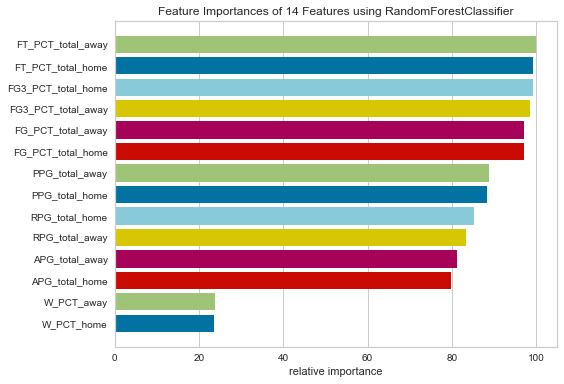

---------------------------------------------
i=1


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      1884
           1       0.65      0.70      0.68      1926

    accuracy                           0.66      3810
   macro avg       0.66      0.66      0.66      3810
weighted avg       0.66      0.66      0.66      3810



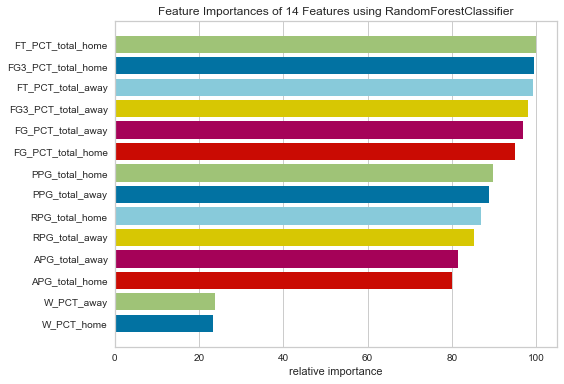

---------------------------------------------
i=2


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.62      0.66      1934
           1       0.65      0.72      0.68      1876

    accuracy                           0.67      3810
   macro avg       0.67      0.67      0.67      3810
weighted avg       0.67      0.67      0.67      3810



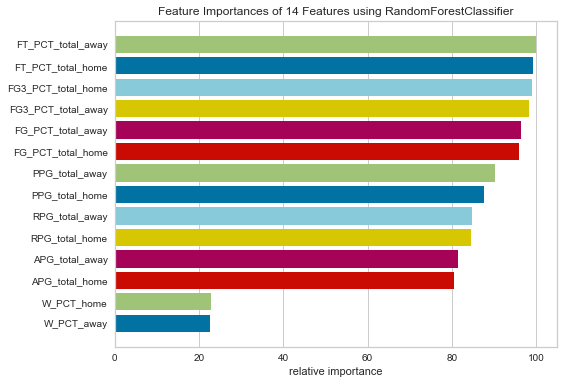

---------------------------------------------
i=3


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1855
           1       0.67      0.67      0.67      1954

    accuracy                           0.66      3809
   macro avg       0.66      0.66      0.66      3809
weighted avg       0.66      0.66      0.66      3809



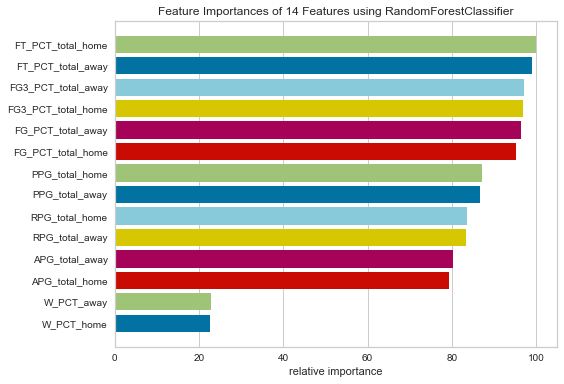

---------------------------------------------
i=4


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1923
           1       0.65      0.70      0.67      1886

    accuracy                           0.66      3809
   macro avg       0.66      0.66      0.66      3809
weighted avg       0.66      0.66      0.66      3809



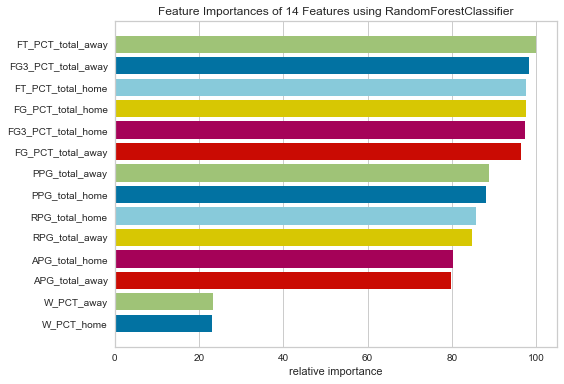

---------------------------------------------
Mean accuracy: 0.6642166915076807
Max accuracy: 0.668503937007874
Min accuracy: 0.6619422572178477
i=5


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.57      0.59      1777
           1       0.59      0.62      0.60      1777

    accuracy                           0.60      3554
   macro avg       0.60      0.60      0.60      3554
weighted avg       0.60      0.60      0.60      3554



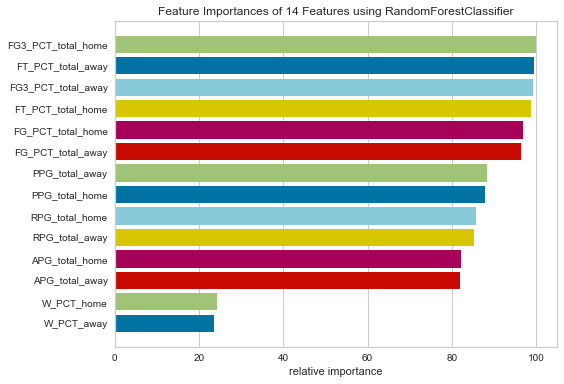

---------------------------------------------
i=6


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      1795
           1       0.58      0.61      0.59      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



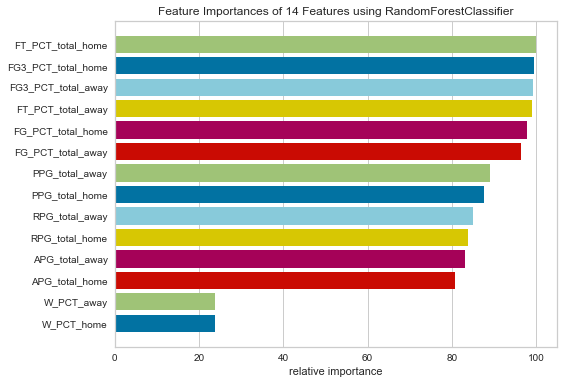

---------------------------------------------
i=7


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1785
           1       0.59      0.62      0.60      1769

    accuracy                           0.59      3554
   macro avg       0.59      0.59      0.59      3554
weighted avg       0.59      0.59      0.59      3554



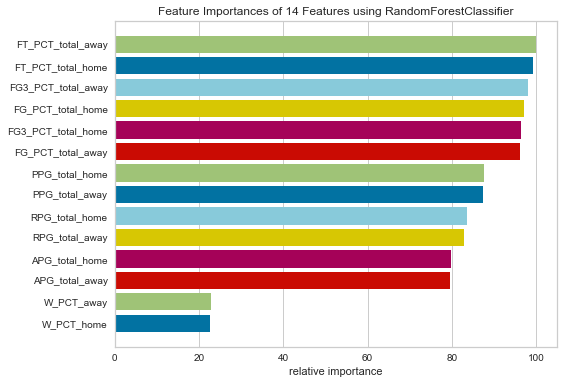

---------------------------------------------
i=8


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1743
           1       0.60      0.61      0.60      1810

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



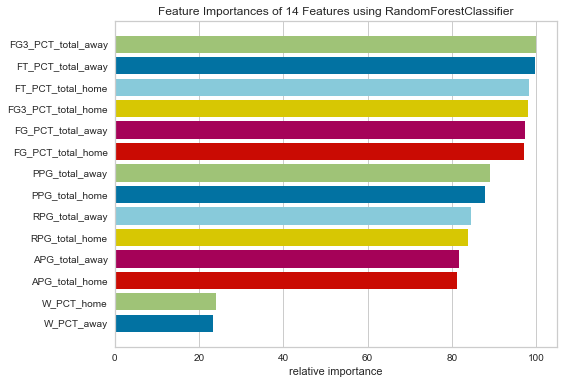

---------------------------------------------
i=9


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      1784
           1       0.58      0.61      0.59      1769

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



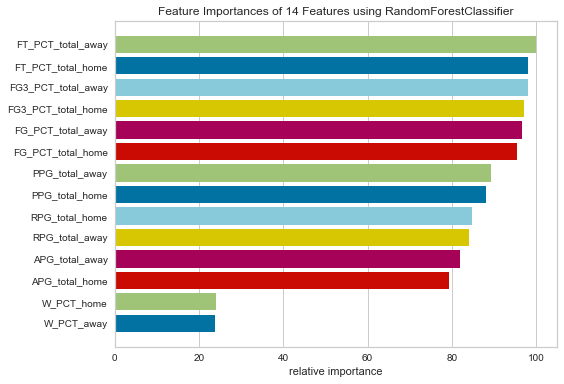

---------------------------------------------
Mean accuracy: 0.5912064610169566
Max accuracy: 0.5956668542487338
Min accuracy: 0.584411930219471
i=10


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1655
           1       0.49      0.51      0.50      1605

    accuracy                           0.50      3260
   macro avg       0.50      0.50      0.50      3260
weighted avg       0.50      0.50      0.50      3260



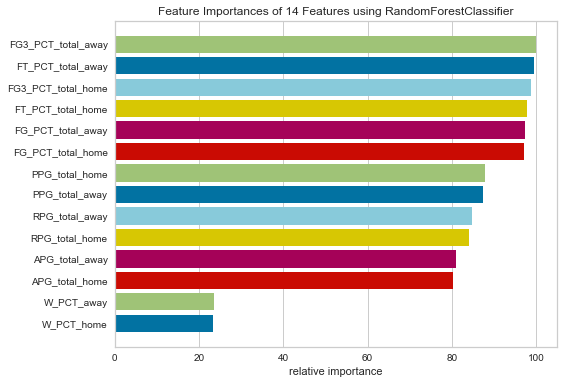

---------------------------------------------
i=11


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.49      0.54      0.52      1581
           1       0.52      0.47      0.50      1678

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



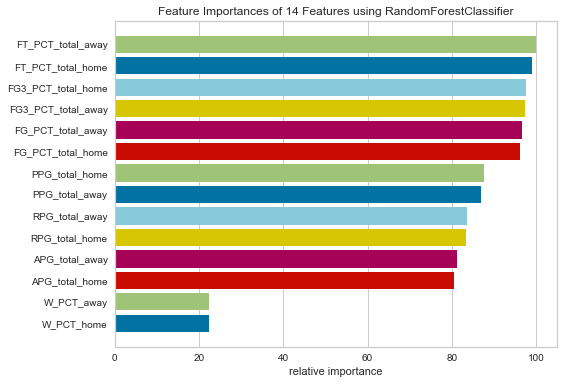

---------------------------------------------
i=12


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.53      0.51      0.52      1667
           1       0.50      0.52      0.51      1592

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



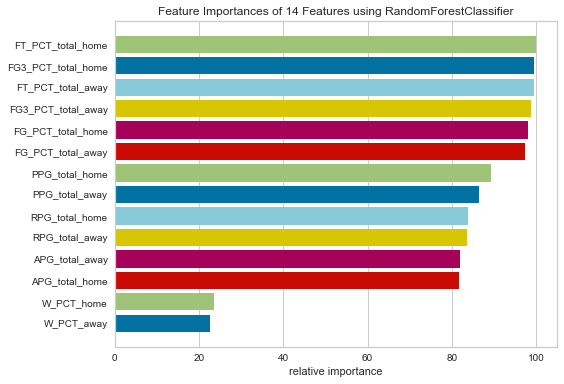

---------------------------------------------
i=13


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1618
           1       0.51      0.49      0.50      1641

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



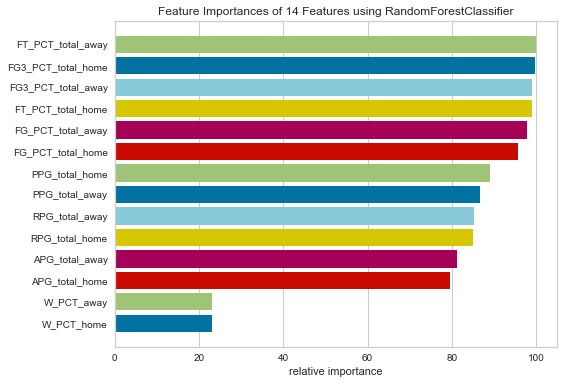

---------------------------------------------
i=14


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1627
           1       0.53      0.50      0.51      1632

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



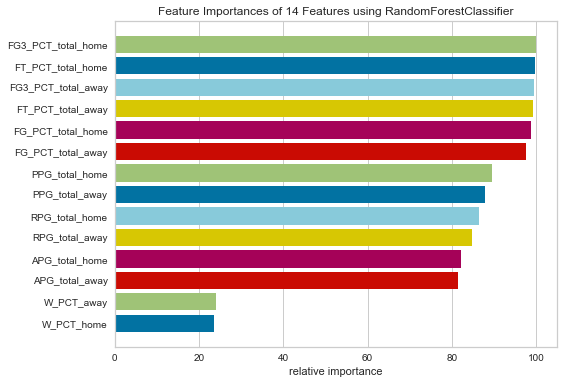

---------------------------------------------
Mean accuracy: 0.5065587603559374
Max accuracy: 0.5145750230131942
Min accuracy: 0.5
i=15


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1654
           1       0.49      0.48      0.48      1585

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



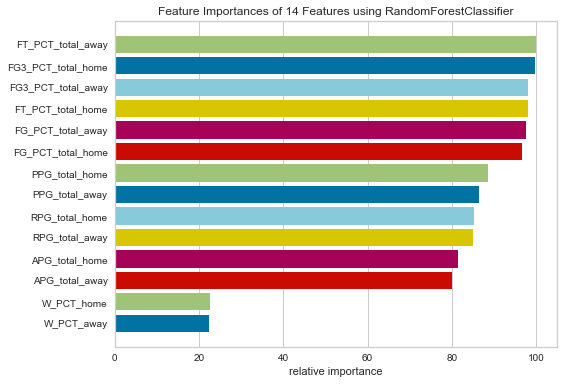

---------------------------------------------
i=16


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1604
           1       0.51      0.47      0.49      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



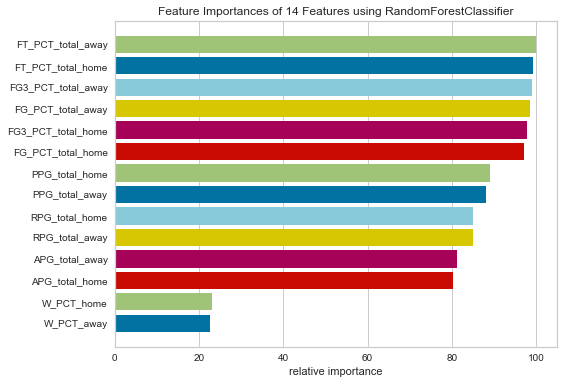

---------------------------------------------
i=17


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1647
           1       0.50      0.49      0.50      1591

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



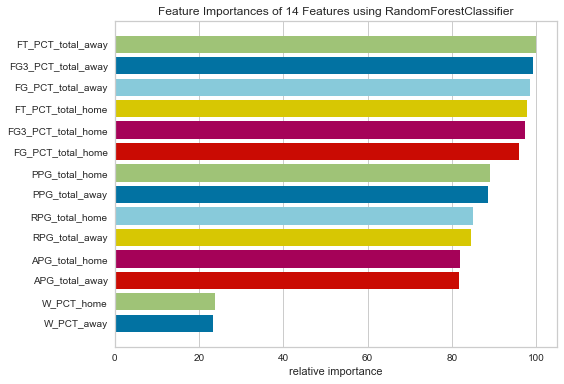

---------------------------------------------
i=18


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.54      0.53      1625
           1       0.52      0.51      0.51      1613

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



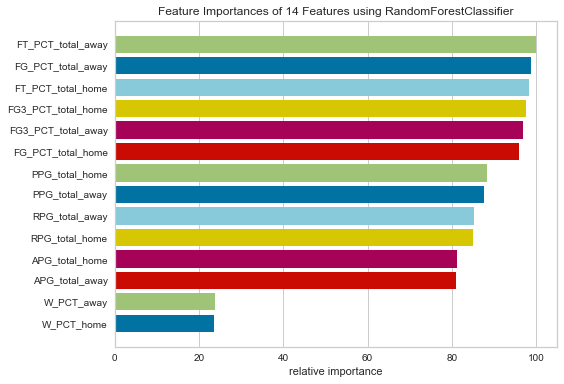

---------------------------------------------
i=19


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.57      0.54      1566
           1       0.54      0.47      0.50      1672

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



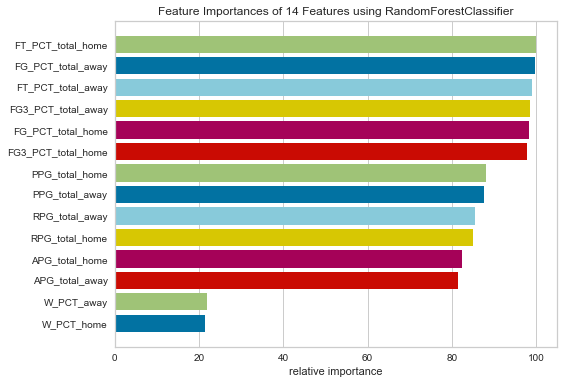

---------------------------------------------
Mean accuracy: 0.5084928253388052
Max accuracy: 0.5240889437924645
Min accuracy: 0.4976844705155912
i=20


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1810
           1       0.57      0.61      0.59      1706

    accuracy                           0.59      3516
   macro avg       0.59      0.59      0.59      3516
weighted avg       0.59      0.59      0.59      3516



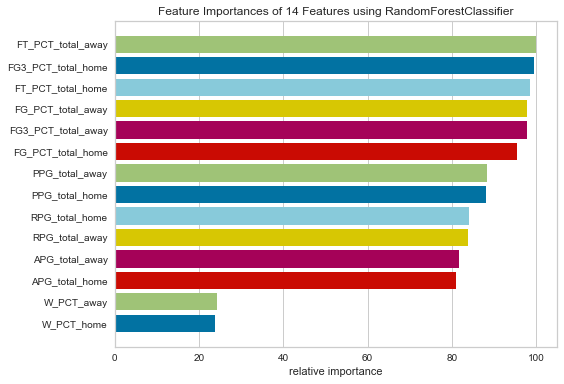

---------------------------------------------
i=21


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1793
           1       0.57      0.61      0.59      1722

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



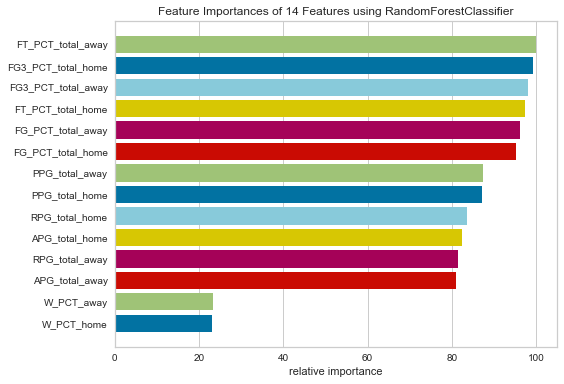

---------------------------------------------
i=22


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      1750
           1       0.58      0.61      0.60      1765

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



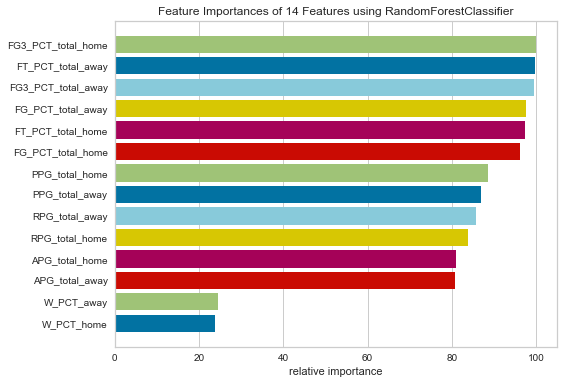

---------------------------------------------
i=23


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.57      0.56      1720
           1       0.58      0.57      0.58      1795

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



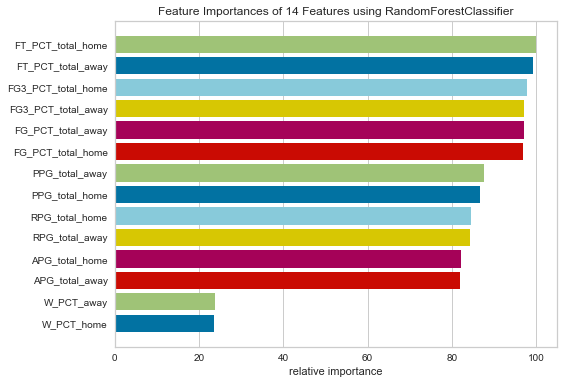

---------------------------------------------
i=24


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1715
           1       0.59      0.59      0.59      1800

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



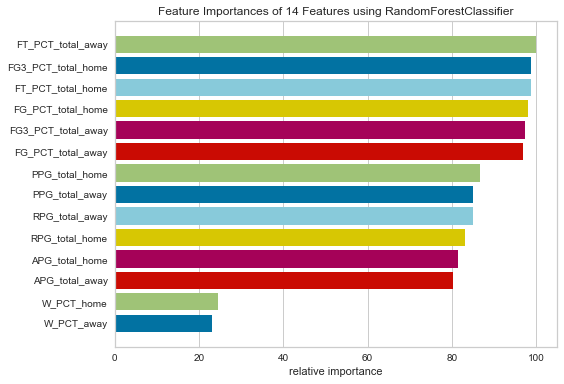

---------------------------------------------
Mean accuracy: 0.581181536305481
Max accuracy: 0.5875995449374289
Min accuracy: 0.5704125177809388
i=25


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1739
           1       0.53      0.55      0.54      1682

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



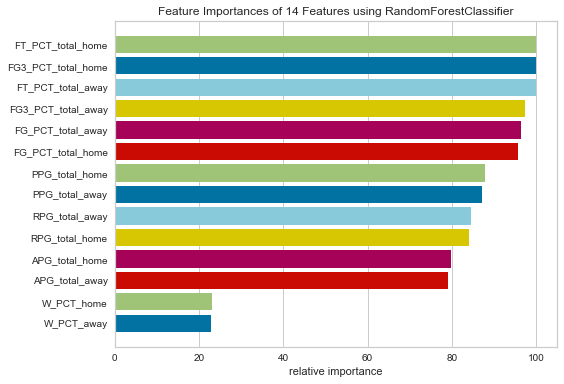

---------------------------------------------
i=26


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.54      0.56      1725
           1       0.55      0.58      0.57      1696

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



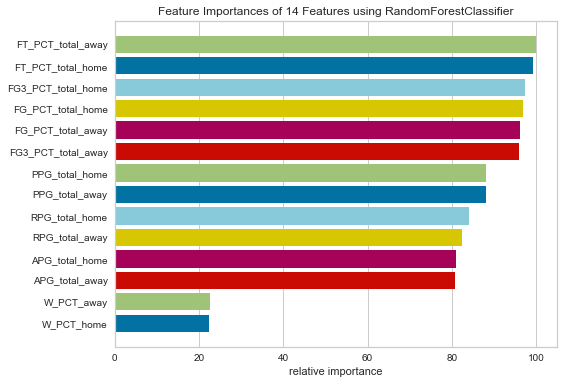

---------------------------------------------
i=27


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      1710
           1       0.55      0.57      0.56      1711

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



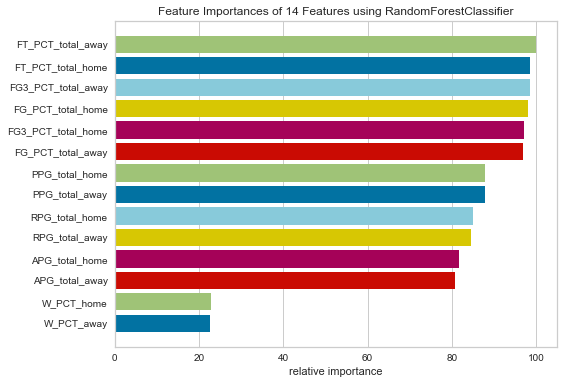

---------------------------------------------
i=28


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.53      0.56      0.54      1668
           1       0.56      0.53      0.54      1753

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



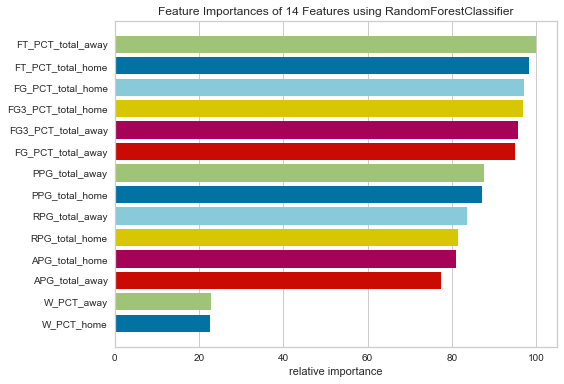

---------------------------------------------
i=29


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1710
           1       0.55      0.56      0.55      1710

    accuracy                           0.55      3420
   macro avg       0.55      0.55      0.55      3420
weighted avg       0.55      0.55      0.55      3420



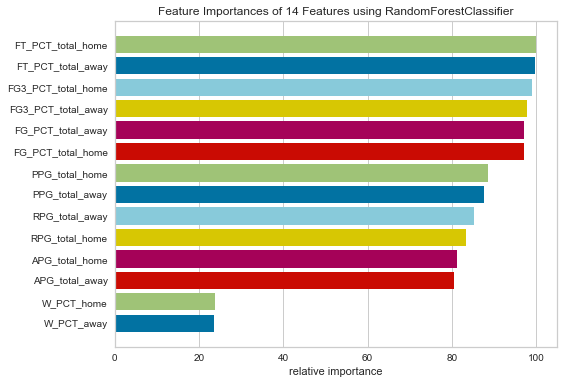

---------------------------------------------
Mean accuracy: 0.5491815258696288
Max accuracy: 0.560654779304297
Min accuracy: 0.541069862613271


In [26]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {'criterion':['gini','entropy']})

## Try prune max depth

i=0
WINNER:

Best Random Forest accuracy ({'max_depth': 32, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.60      0.64      1928
           1       0.64      0.72      0.68      1882

    accuracy                           0.66      3810
   macro avg       0.67      0.66      0.66      3810
weighted avg       0.67      0.66      0.66      3810



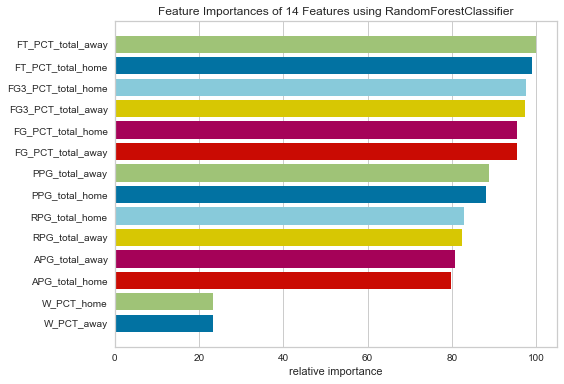

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_depth': 25, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1884
           1       0.66      0.70      0.68      1926

    accuracy                           0.67      3810
   macro avg       0.67      0.67      0.67      3810
weighted avg       0.67      0.67      0.67      3810



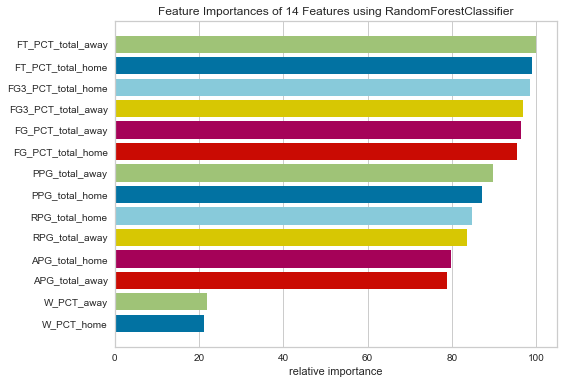

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_depth': 37, 'criterion': 'gini'}): 0.68
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      1934
           1       0.65      0.74      0.69      1876

    accuracy                           0.68      3810
   macro avg       0.68      0.68      0.68      3810
weighted avg       0.68      0.68      0.68      3810



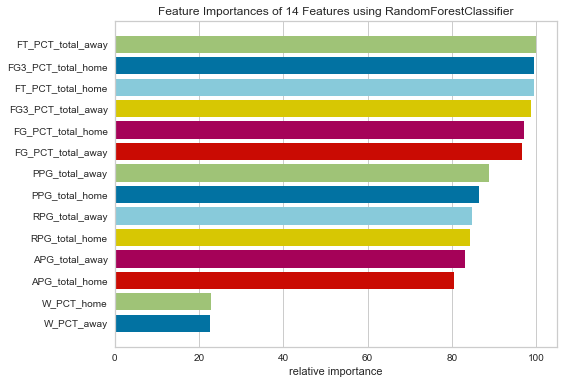

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_depth': 40, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      1855
           1       0.67      0.69      0.68      1954

    accuracy                           0.67      3809
   macro avg       0.67      0.67      0.67      3809
weighted avg       0.67      0.67      0.67      3809



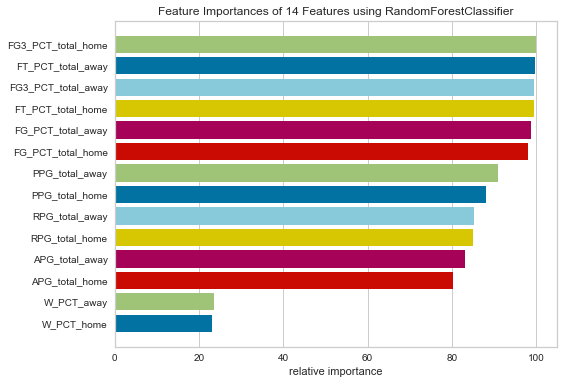

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_depth': 37, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      1923
           1       0.65      0.73      0.69      1886

    accuracy                           0.67      3809
   macro avg       0.67      0.67      0.67      3809
weighted avg       0.68      0.67      0.67      3809



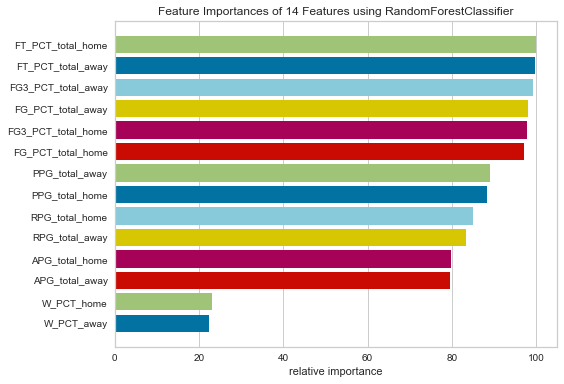

---------------------------------------------
Mean accuracy: 0.6693352151865763
Max accuracy: 0.6766404199475066
Min accuracy: 0.662992125984252
i=5
FGP:

Best Random Forest accuracy ({'max_depth': 22, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      1777
           1       0.59      0.60      0.60      1777

    accuracy                           0.59      3554
   macro avg       0.59      0.59      0.59      3554
weighted avg       0.59      0.59      0.59      3554



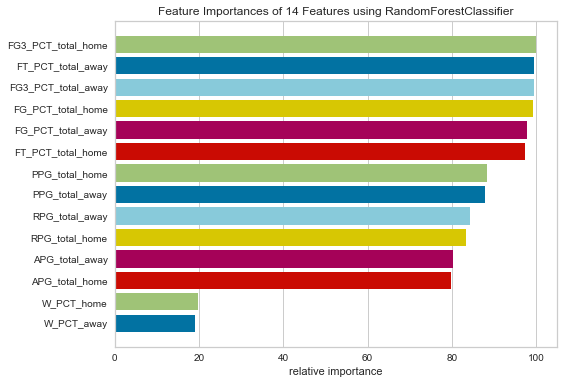

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_depth': 26, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.55      0.58      1795
           1       0.58      0.62      0.60      1759

    accuracy                           0.59      3554
   macro avg       0.59      0.59      0.59      3554
weighted avg       0.59      0.59      0.59      3554



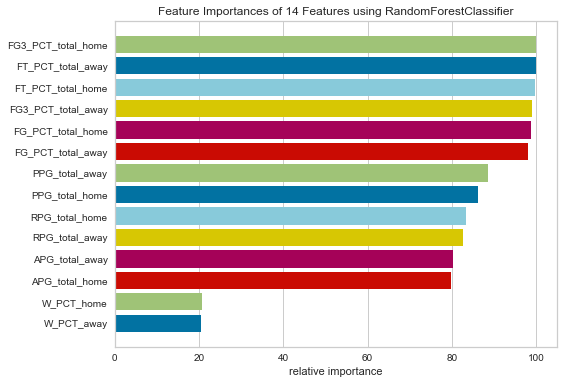

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_depth': 29, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1785
           1       0.59      0.64      0.61      1769

    accuracy                           0.60      3554
   macro avg       0.60      0.60      0.60      3554
weighted avg       0.60      0.60      0.60      3554



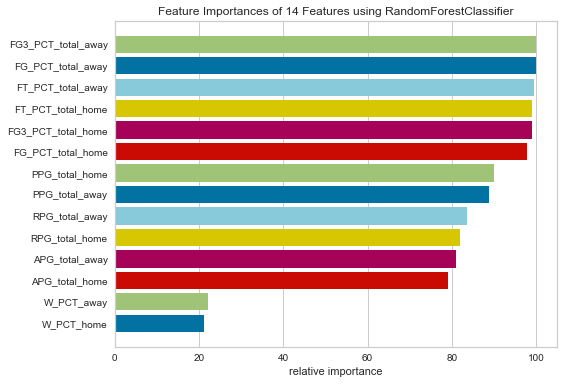

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_depth': 27, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.56      0.57      1743
           1       0.60      0.62      0.61      1810

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



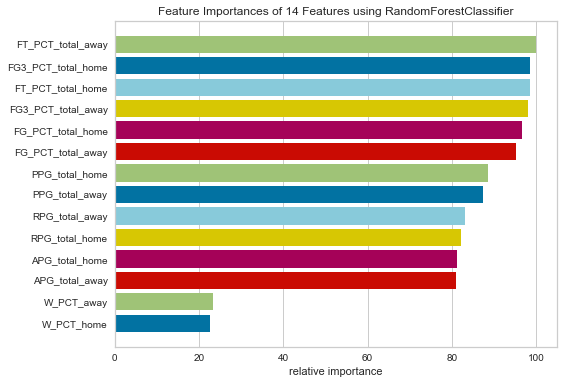

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_depth': 34, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.54      0.57      1784
           1       0.57      0.62      0.60      1769

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.58      3553
weighted avg       0.58      0.58      0.58      3553



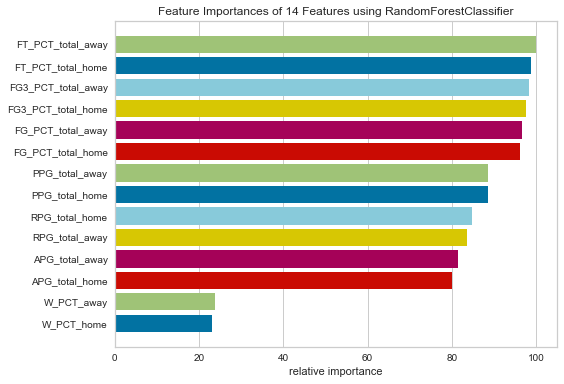

---------------------------------------------
Mean accuracy: 0.5928244553375439
Max accuracy: 0.5962296004501969
Min accuracy: 0.5886325267304445
i=10
FG3:

Best Random Forest accuracy ({'max_depth': 50, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1655
           1       0.49      0.51      0.50      1605

    accuracy                           0.50      3260
   macro avg       0.50      0.50      0.50      3260
weighted avg       0.50      0.50      0.50      3260



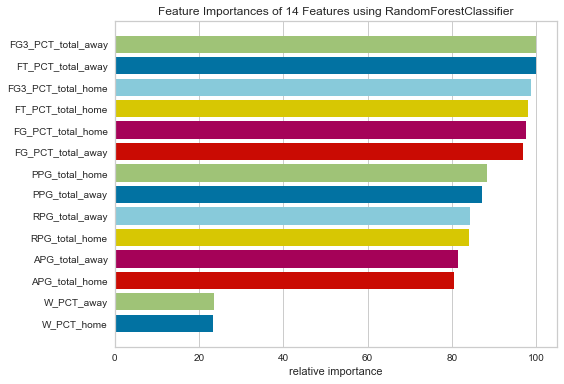

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_depth': 26, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1581
           1       0.52      0.50      0.51      1678

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



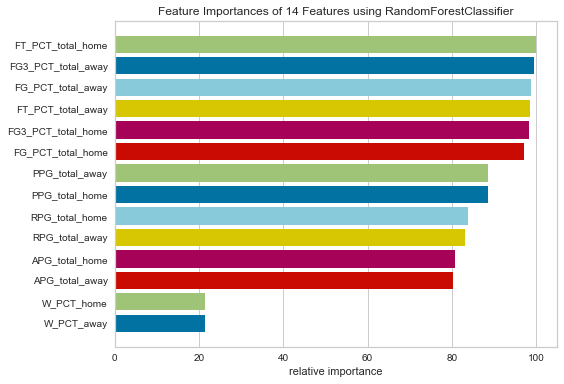

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_depth': 49, 'criterion': 'entropy'}): 0.53
              precision    recall  f1-score   support

           0       0.54      0.53      0.53      1667
           1       0.51      0.52      0.52      1592

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



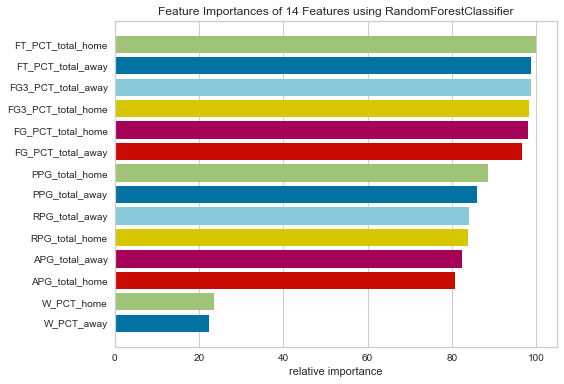

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_depth': 14, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1618
           1       0.51      0.48      0.49      1641

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



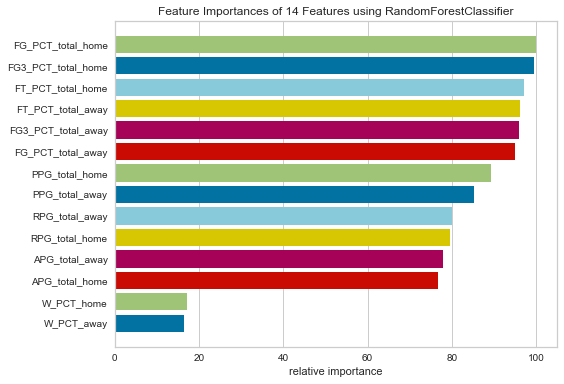

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_depth': 40, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1627
           1       0.53      0.49      0.51      1632

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



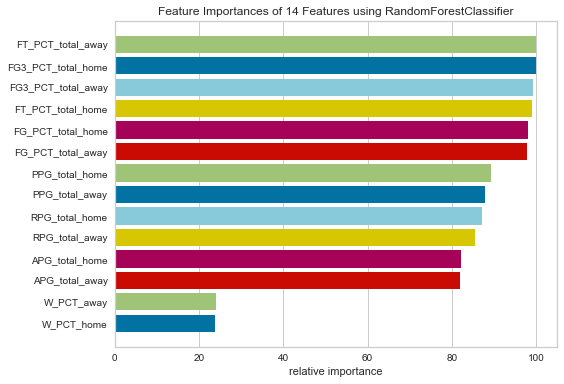

---------------------------------------------
Mean accuracy: 0.5107009941323414
Max accuracy: 0.5256213562442467
Min accuracy: 0.501840490797546
i=15
FT:

Best Random Forest accuracy ({'max_depth': 16, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.53      0.53      1654
           1       0.51      0.51      0.51      1585

    accuracy                           0.52      3239
   macro avg       0.52      0.52      0.52      3239
weighted avg       0.52      0.52      0.52      3239



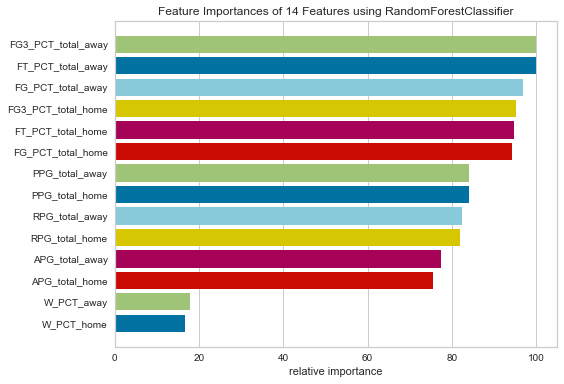

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_depth': 45, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1604
           1       0.51      0.46      0.48      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



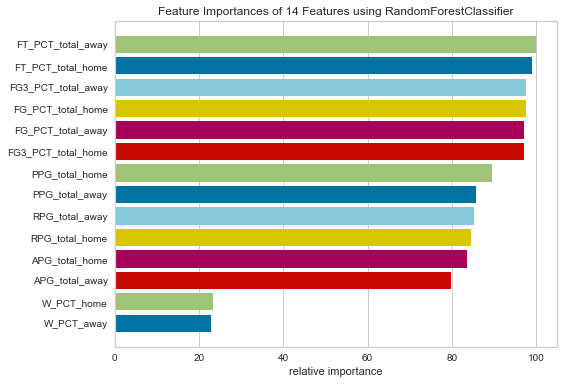

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_depth': 26, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.51      0.51      1647
           1       0.50      0.52      0.51      1591

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



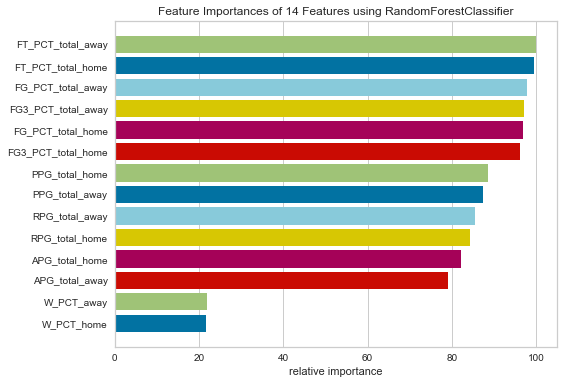

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_depth': 31, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1625
           1       0.50      0.50      0.50      1613

    accuracy                           0.50      3238
   macro avg       0.50      0.50      0.50      3238
weighted avg       0.50      0.50      0.50      3238



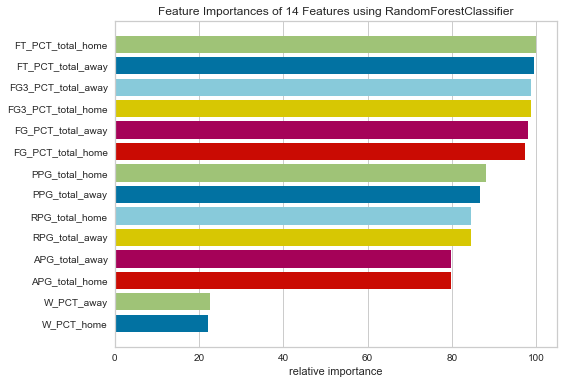

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_depth': 38, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.56      0.53      1566
           1       0.54      0.48      0.51      1672

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



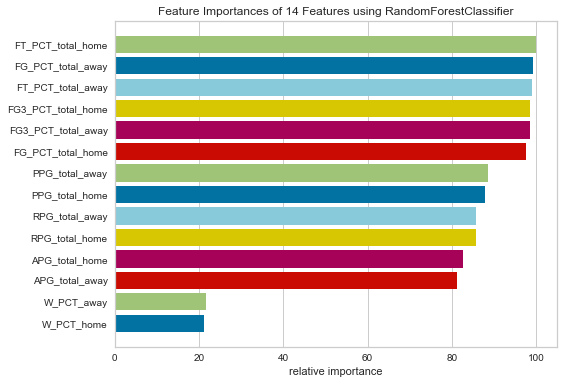

---------------------------------------------
Mean accuracy: 0.5085682218774009
Max accuracy: 0.5199135535659154
Min accuracy: 0.4996911673872761
i=20
AST:

Best Random Forest accuracy ({'max_depth': 58, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1810
           1       0.57      0.61      0.59      1706

    accuracy                           0.59      3516
   macro avg       0.59      0.59      0.59      3516
weighted avg       0.59      0.59      0.59      3516



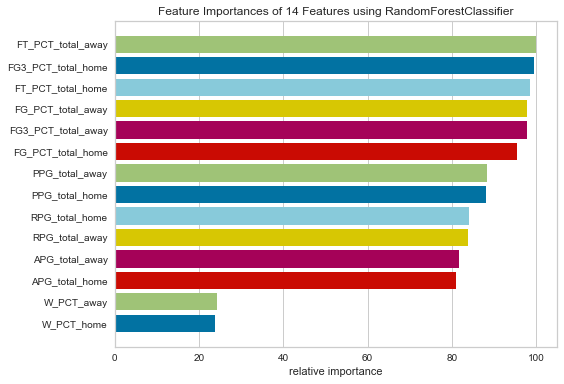

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_depth': 47, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.54      0.57      1793
           1       0.56      0.61      0.59      1722

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



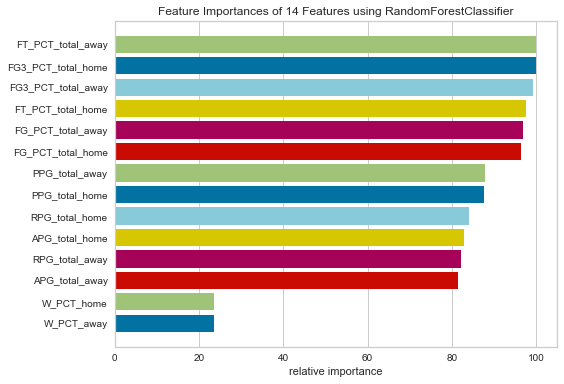

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_depth': 19, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1750
           1       0.59      0.61      0.60      1765

    accuracy                           0.59      3515
   macro avg       0.59      0.59      0.59      3515
weighted avg       0.59      0.59      0.59      3515



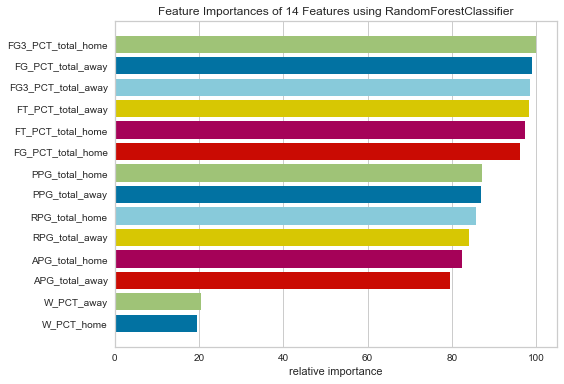

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_depth': 42, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      1720
           1       0.59      0.60      0.60      1795

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



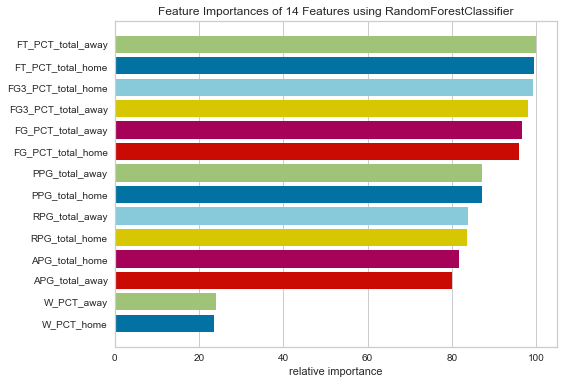

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_depth': 53, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1715
           1       0.59      0.59      0.59      1800

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



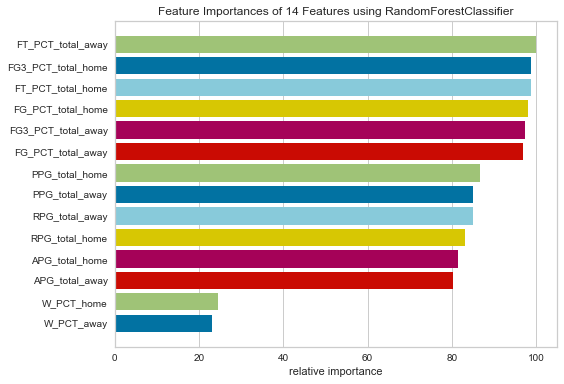

---------------------------------------------
Mean accuracy: 0.5840264865188523
Max accuracy: 0.590896159317212
Min accuracy: 0.5766714082503556
i=25
REB:

Best Random Forest accuracy ({'max_depth': 32, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.53      0.56      1739
           1       0.55      0.60      0.58      1682

    accuracy                           0.57      3421
   macro avg       0.57      0.57      0.57      3421
weighted avg       0.57      0.57      0.57      3421



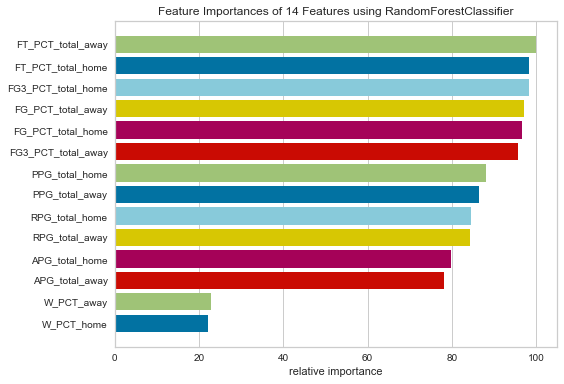

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_depth': 23, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.51      0.54      1725
           1       0.54      0.59      0.57      1696

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



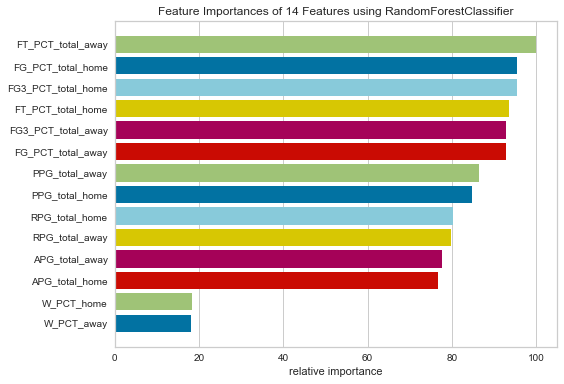

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_depth': 29, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.51      0.53      1710
           1       0.55      0.59      0.57      1711

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



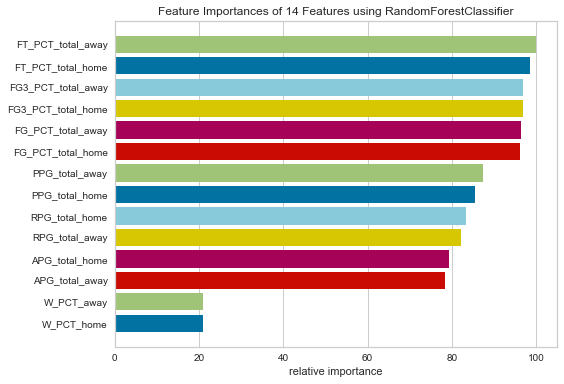

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_depth': 41, 'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.53      0.56      0.55      1668
           1       0.56      0.53      0.54      1753

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.55      0.54      0.54      3421



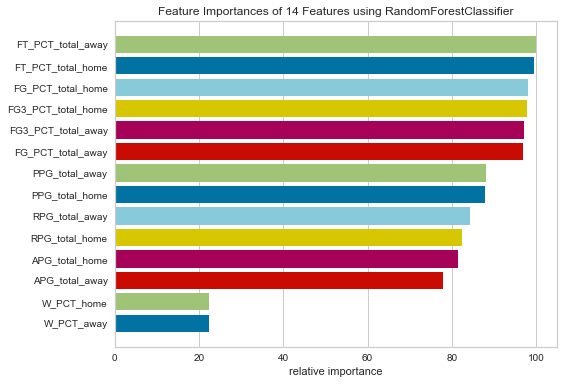

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_depth': 36, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1710
           1       0.56      0.60      0.58      1710

    accuracy                           0.56      3420
   macro avg       0.56      0.56      0.56      3420
weighted avg       0.56      0.56      0.56      3420



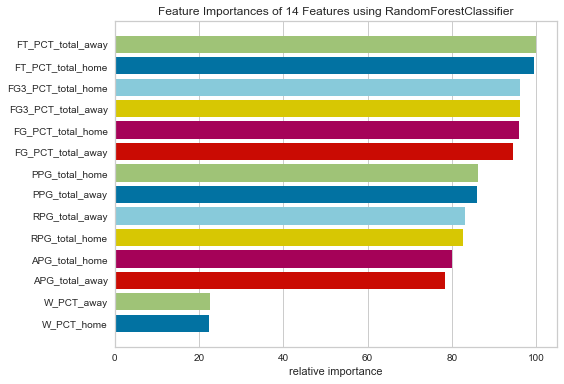

---------------------------------------------
Mean accuracy: 0.5530546623794212
Max accuracy: 0.5662087109032446
Min accuracy: 0.5442852966968723


In [27]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(4,60)],
    'criterion': ['gini', 'entropy'],
})

## Try prune impurity decrease

i=0
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1928
           1       0.49      1.00      0.66      1882

    accuracy                           0.49      3810
   macro avg       0.25      0.50      0.33      3810
weighted avg       0.24      0.49      0.33      3810



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

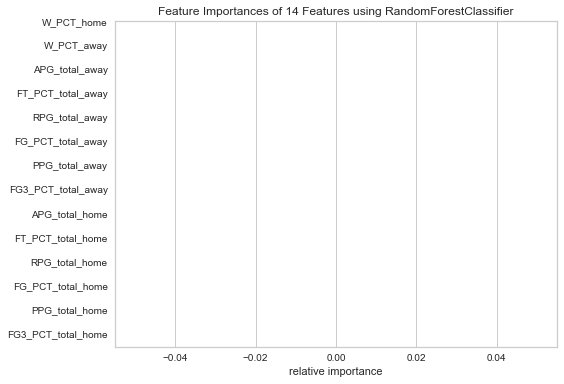

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.4, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1884
           1       0.00      0.00      0.00      1926

    accuracy                           0.49      3810
   macro avg       0.25      0.50      0.33      3810
weighted avg       0.24      0.49      0.33      3810



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

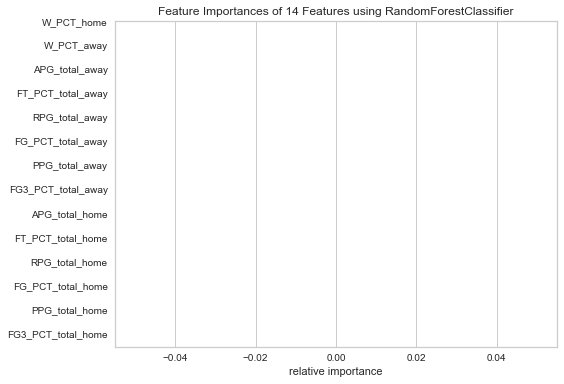

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.35, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1934
           1       0.49      1.00      0.66      1876

    accuracy                           0.49      3810
   macro avg       0.25      0.50      0.33      3810
weighted avg       0.24      0.49      0.32      3810



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

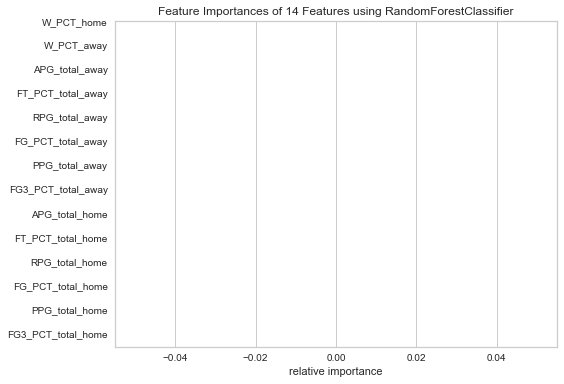

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.45, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1855
           1       0.00      0.00      0.00      1954

    accuracy                           0.49      3809
   macro avg       0.24      0.50      0.33      3809
weighted avg       0.24      0.49      0.32      3809



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

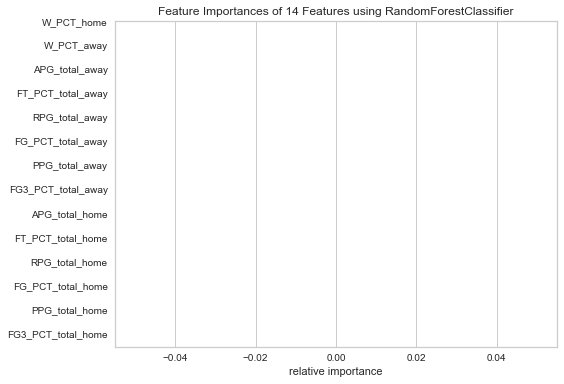

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1923
           1       0.65      0.70      0.67      1886

    accuracy                           0.66      3809
   macro avg       0.66      0.66      0.66      3809
weighted avg       0.66      0.66      0.66      3809



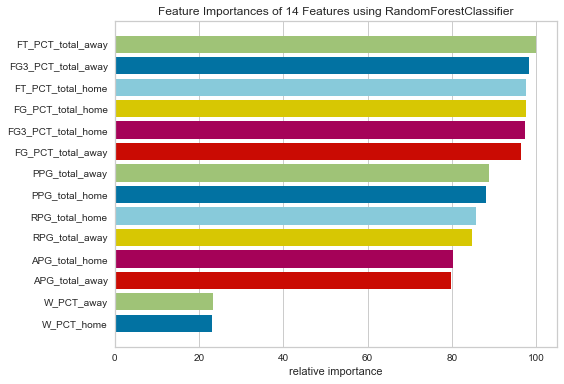

---------------------------------------------
Mean accuracy: 0.49196108953170037
Max accuracy: 0.494488188976378
Min accuracy: 0.4870044631136781
i=5
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1777
           1       0.50      1.00      0.67      1777

    accuracy                           0.50      3554
   macro avg       0.25      0.50      0.33      3554
weighted avg       0.25      0.50      0.33      3554



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

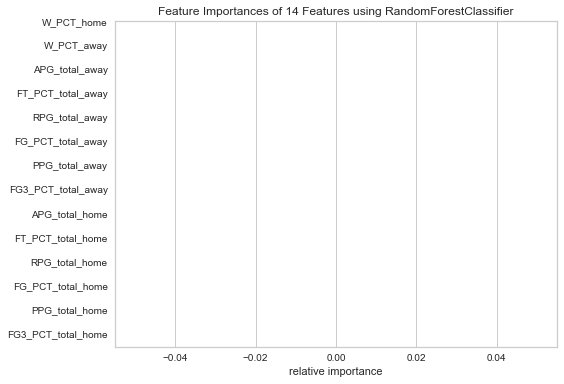

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.15, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1795
           1       0.49      1.00      0.66      1759

    accuracy                           0.49      3554
   macro avg       0.25      0.50      0.33      3554
weighted avg       0.24      0.49      0.33      3554



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

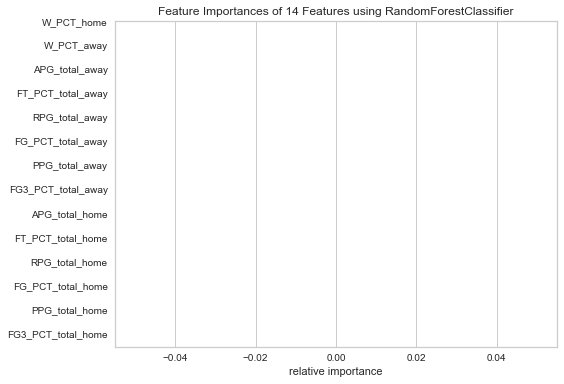

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1785
           1       0.59      0.63      0.61      1769

    accuracy                           0.60      3554
   macro avg       0.60      0.60      0.60      3554
weighted avg       0.60      0.60      0.59      3554



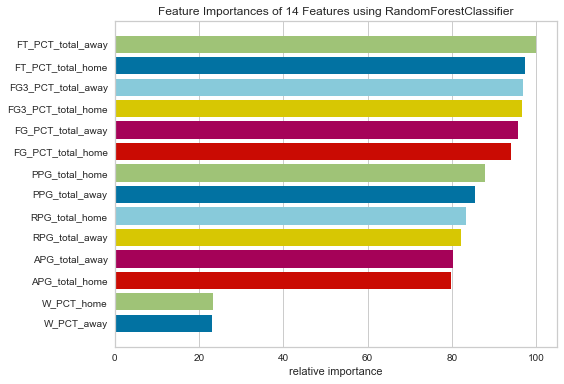

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1743
           1       0.00      0.00      0.00      1810

    accuracy                           0.49      3553
   macro avg       0.25      0.50      0.33      3553
weighted avg       0.24      0.49      0.32      3553



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

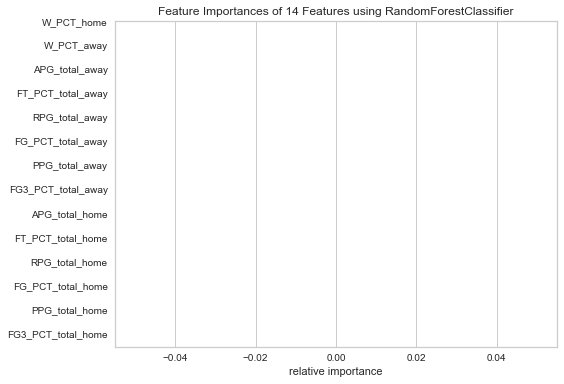

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      1784
           1       0.58      0.61      0.59      1769

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



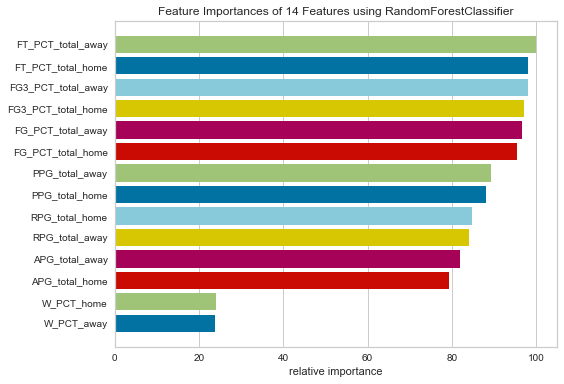

---------------------------------------------
Mean accuracy: 0.5202230283728303
Max accuracy: 0.5953854811480023
Min accuracy: 0.49057134815648745
i=10
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1655
           1       0.49      0.51      0.50      1605

    accuracy                           0.50      3260
   macro avg       0.50      0.50      0.50      3260
weighted avg       0.50      0.50      0.50      3260



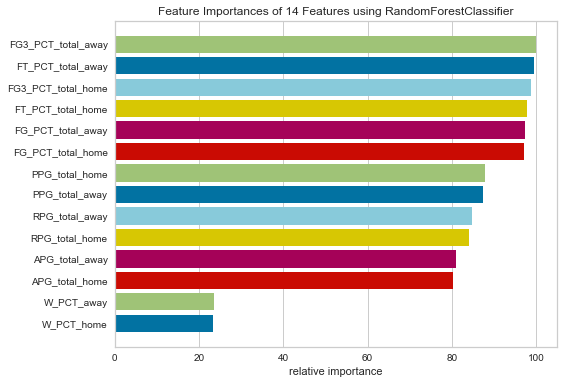

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.49      0.54      0.52      1581
           1       0.52      0.47      0.50      1678

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



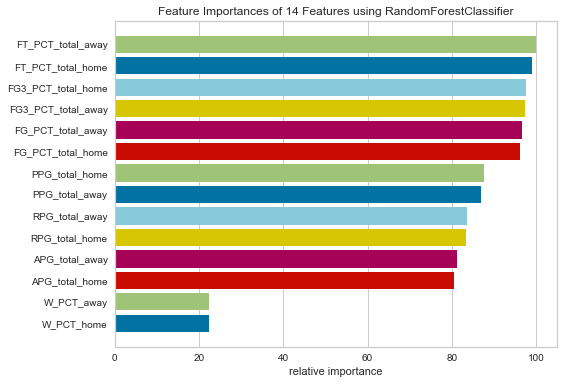

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1667
           1       0.49      1.00      0.66      1592

    accuracy                           0.49      3259
   macro avg       0.24      0.50      0.33      3259
weighted avg       0.24      0.49      0.32      3259



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

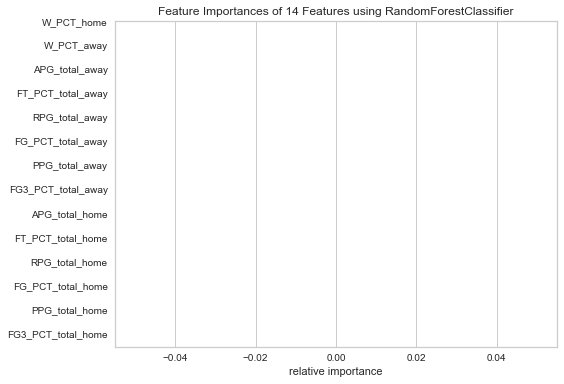

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1618
           1       0.51      0.49      0.50      1641

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



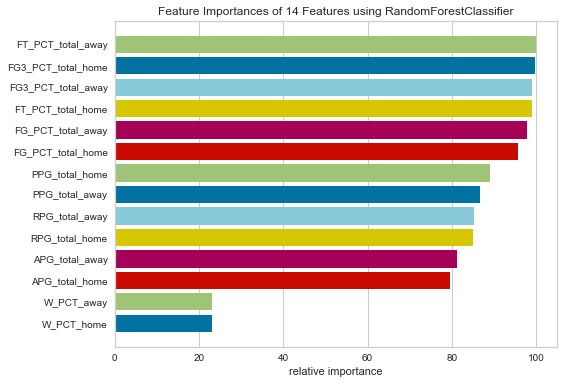

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'min_impurity_decrease': 0.55, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1627
           1       0.00      0.00      0.00      1632

    accuracy                           0.50      3259
   macro avg       0.25      0.50      0.33      3259
weighted avg       0.25      0.50      0.33      3259



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

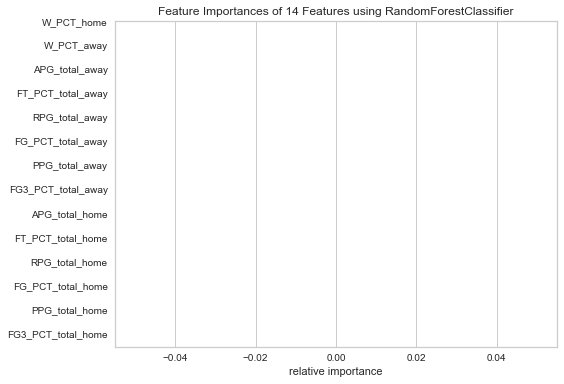

---------------------------------------------
Mean accuracy: 0.5000383553237189
Max accuracy: 0.5075176434489107
Min accuracy: 0.48849340288432036
i=15
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.75, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1654
           1       0.49      1.00      0.66      1585

    accuracy                           0.49      3239
   macro avg       0.24      0.50      0.33      3239
weighted avg       0.24      0.49      0.32      3239



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

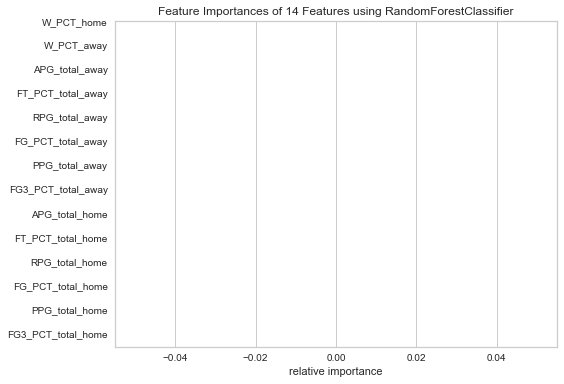

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1604
           1       0.00      0.00      0.00      1635

    accuracy                           0.50      3239
   macro avg       0.25      0.50      0.33      3239
weighted avg       0.25      0.50      0.33      3239



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

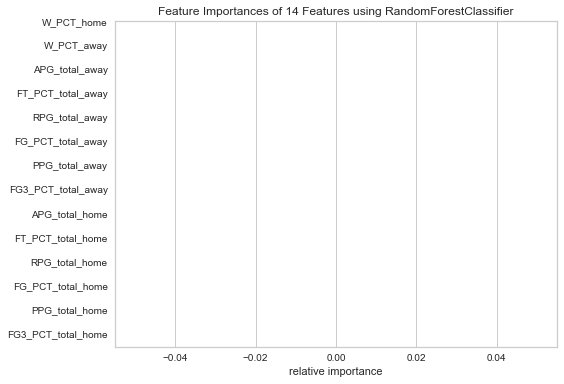

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.35, 'criterion': 'gini'}): 0.49
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1647
           1       0.49      1.00      0.66      1591

    accuracy                           0.49      3238
   macro avg       0.25      0.50      0.33      3238
weighted avg       0.24      0.49      0.32      3238



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

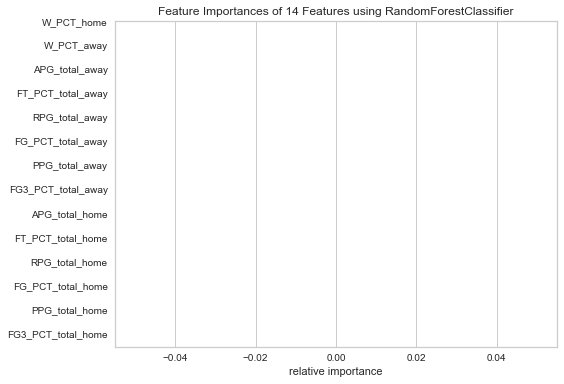

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.55      0.53      1625
           1       0.51      0.48      0.50      1613

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.51      3238
weighted avg       0.52      0.52      0.51      3238



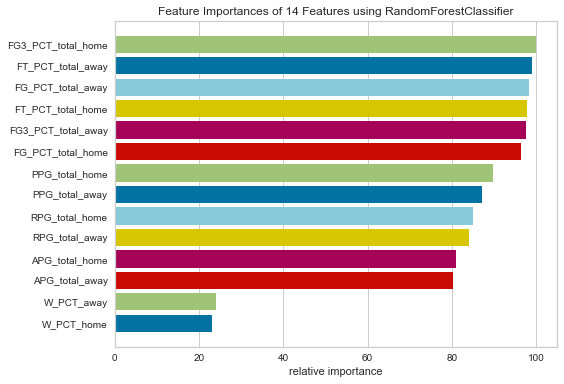

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.50      0.57      0.54      1566
           1       0.54      0.47      0.50      1672

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



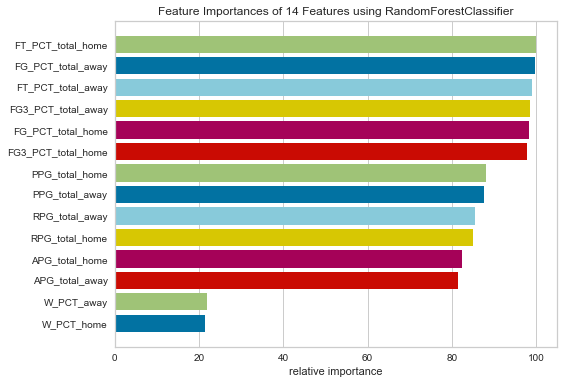

---------------------------------------------
Mean accuracy: 0.49776215540945257
Max accuracy: 0.5151327980234712
Min accuracy: 0.48934856437171964
i=20
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1810
           1       0.56      0.60      0.58      1706

    accuracy                           0.58      3516
   macro avg       0.58      0.58      0.58      3516
weighted avg       0.58      0.58      0.58      3516



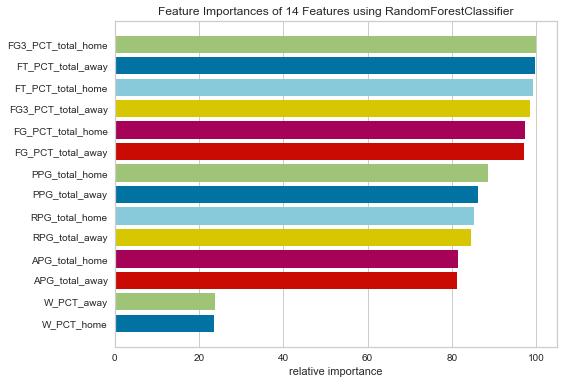

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1793
           1       0.57      0.61      0.59      1722

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



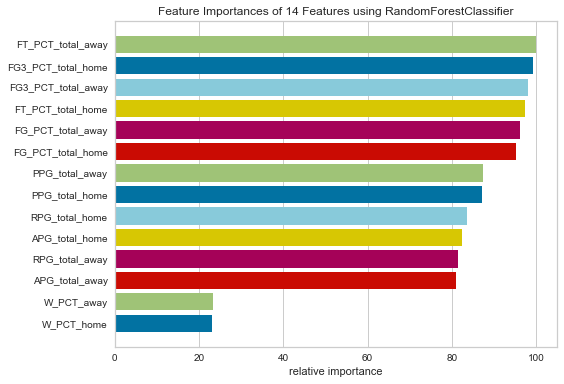

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1750
           1       0.00      0.00      0.00      1765

    accuracy                           0.50      3515
   macro avg       0.25      0.50      0.33      3515
weighted avg       0.25      0.50      0.33      3515



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

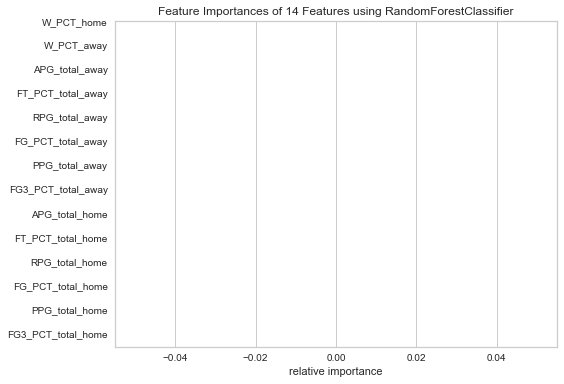

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.56      0.57      0.56      1720
           1       0.58      0.57      0.58      1795

    accuracy                           0.57      3515
   macro avg       0.57      0.57      0.57      3515
weighted avg       0.57      0.57      0.57      3515



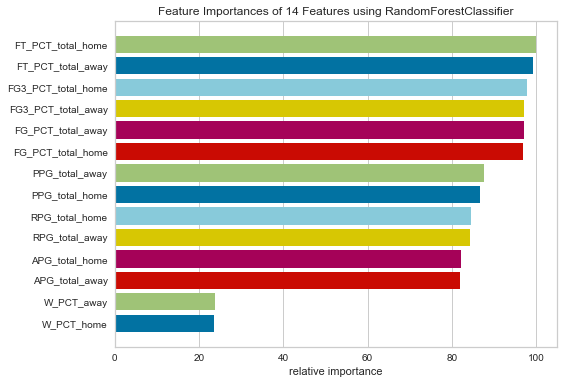

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.57      0.60      0.59      1715
           1       0.60      0.58      0.59      1800

    accuracy                           0.59      3515
   macro avg       0.59      0.59      0.59      3515
weighted avg       0.59      0.59      0.59      3515



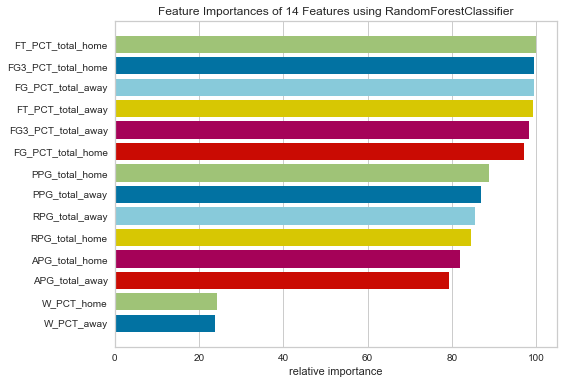

---------------------------------------------
Mean accuracy: 0.5581378441491608
Max accuracy: 0.5823613086770981
Min accuracy: 0.49786628733997157
i=25
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1739
           1       0.53      0.55      0.54      1682

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



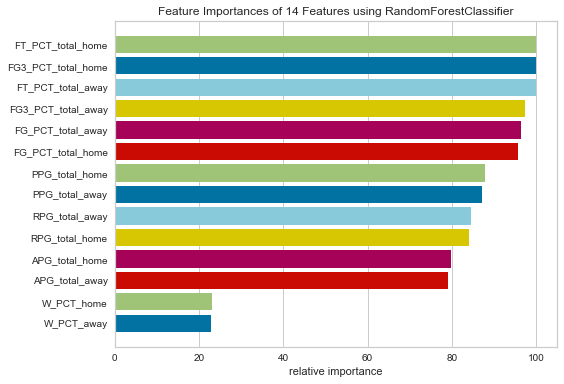

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.1, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1725
           1       0.50      1.00      0.66      1696

    accuracy                           0.50      3421
   macro avg       0.25      0.50      0.33      3421
weighted avg       0.25      0.50      0.33      3421



C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prabj\Anaconda3\lib\site-packages\yellowbrick\

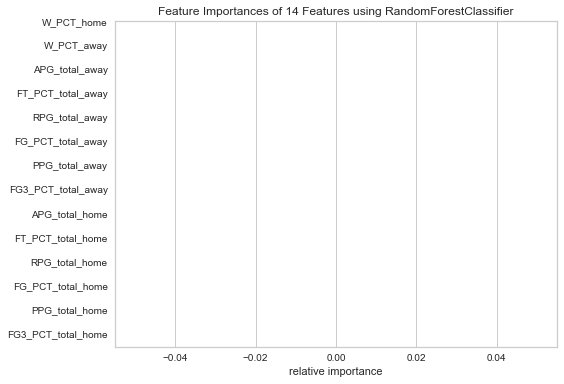

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1710
           1       0.54      0.54      0.54      1711

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



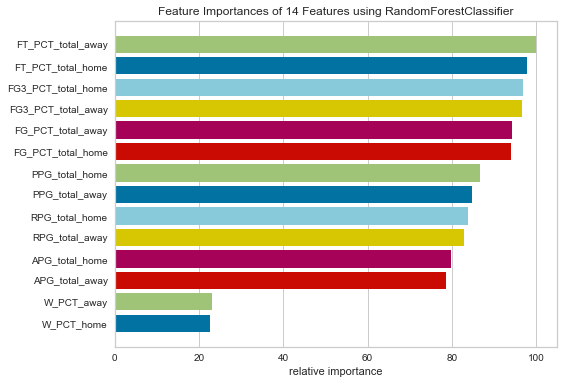

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      1668
           1       0.58      0.54      0.56      1753

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



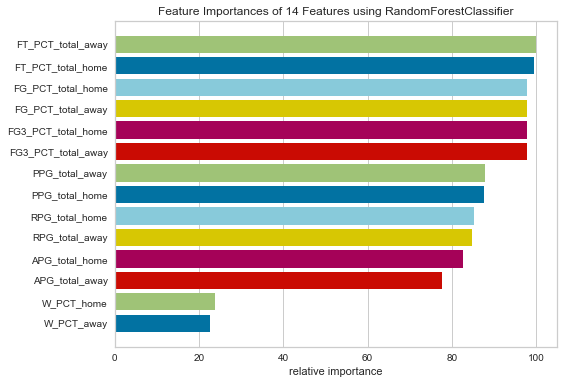

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.55      0.56      1710
           1       0.56      0.58      0.57      1710

    accuracy                           0.56      3420
   macro avg       0.56      0.56      0.56      3420
weighted avg       0.56      0.56      0.56      3420



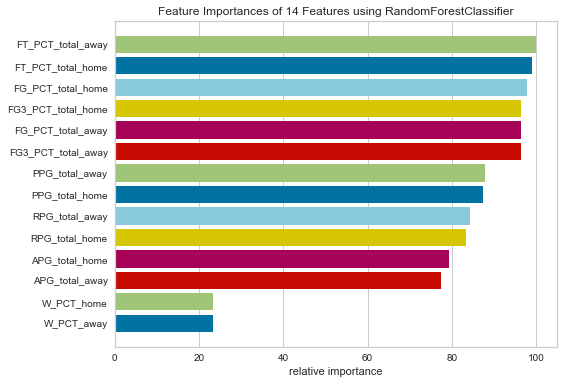

---------------------------------------------
Mean accuracy: 0.5360274773458054
Max accuracy: 0.5629932768196434
Min accuracy: 0.49576147325343467


In [28]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],
    'criterion': ['gini', 'entropy'],
})
# print('Any non-zero min_impurity_decrease causes all classifications to be 1')

## Try prune max leaves

i=0
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 882, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      1928
           1       0.64      0.70      0.67      1882

    accuracy                           0.66      3810
   macro avg       0.66      0.66      0.66      3810
weighted avg       0.66      0.66      0.66      3810



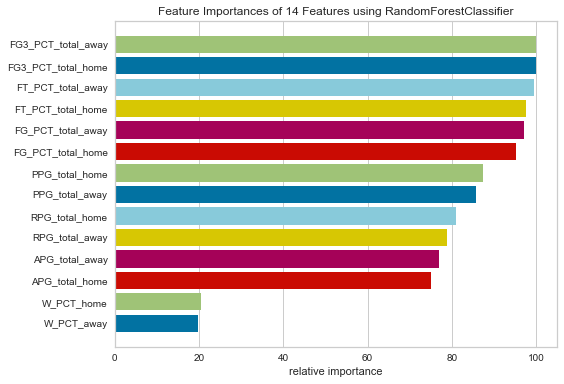

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 972, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      1884
           1       0.66      0.68      0.67      1926

    accuracy                           0.66      3810
   macro avg       0.66      0.66      0.66      3810
weighted avg       0.66      0.66      0.66      3810



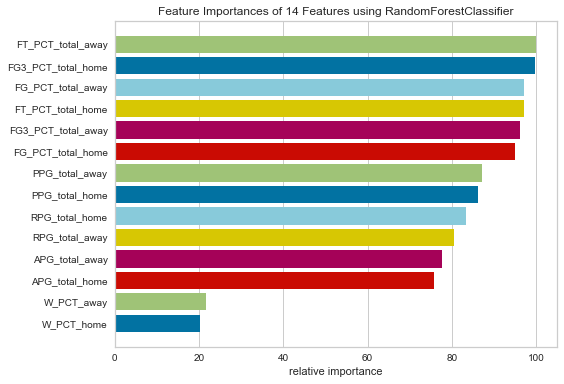

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 982, 'criterion': 'entropy'}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.62      0.66      1934
           1       0.65      0.72      0.68      1876

    accuracy                           0.67      3810
   macro avg       0.67      0.67      0.67      3810
weighted avg       0.67      0.67      0.67      3810



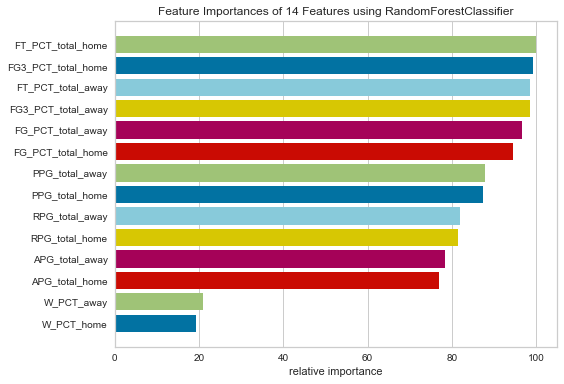

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 962, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      1855
           1       0.67      0.64      0.66      1954

    accuracy                           0.65      3809
   macro avg       0.65      0.65      0.65      3809
weighted avg       0.65      0.65      0.65      3809



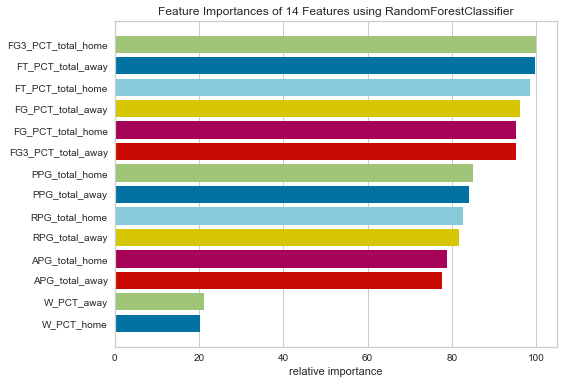

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_leaf_nodes': 902, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      1923
           1       0.64      0.69      0.66      1886

    accuracy                           0.66      3809
   macro avg       0.66      0.66      0.66      3809
weighted avg       0.66      0.66      0.66      3809



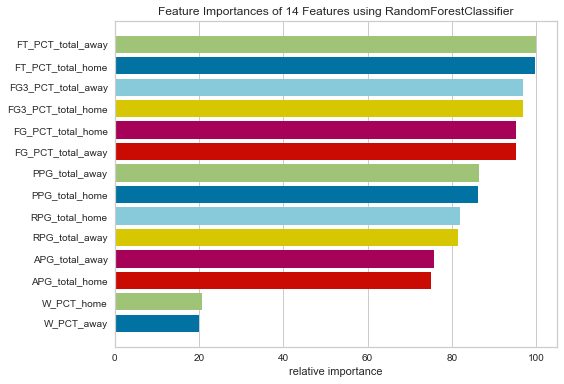

---------------------------------------------
Mean accuracy: 0.6604759483169094
Max accuracy: 0.6700787401574804
Min accuracy: 0.6534523496980835
i=5
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 904, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.61      0.58      0.59      1777
           1       0.60      0.62      0.61      1777

    accuracy                           0.60      3554
   macro avg       0.60      0.60      0.60      3554
weighted avg       0.60      0.60      0.60      3554



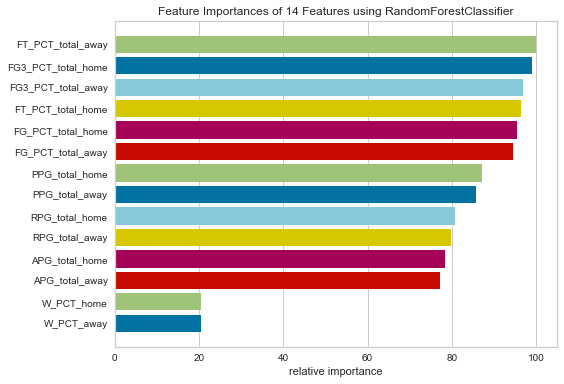

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 982, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1795
           1       0.57      0.59      0.58      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



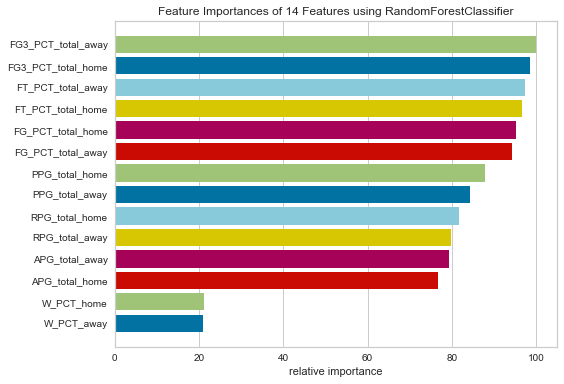

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 926, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.54      0.56      1785
           1       0.57      0.61      0.59      1769

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



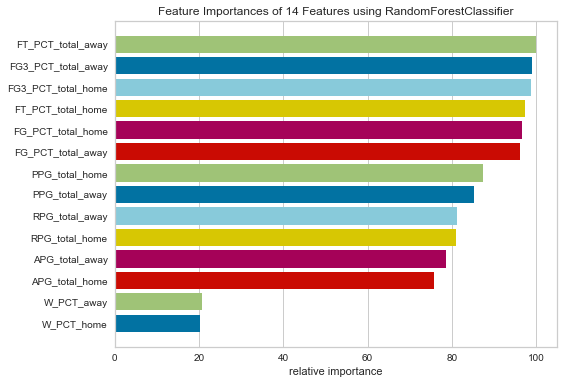

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 842, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1743
           1       0.60      0.60      0.60      1810

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



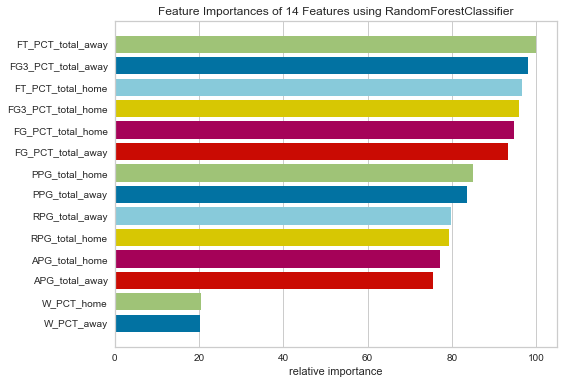

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_leaf_nodes': 724, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1784
           1       0.58      0.61      0.60      1769

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



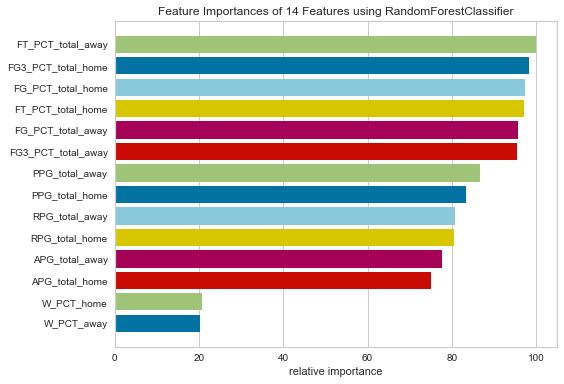

---------------------------------------------
Mean accuracy: 0.5887445651752123
Max accuracy: 0.602701181767023
Min accuracy: 0.5790658413055711
i=10
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 712, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.47      0.50      1655
           1       0.50      0.55      0.53      1605

    accuracy                           0.51      3260
   macro avg       0.51      0.51      0.51      3260
weighted avg       0.51      0.51      0.51      3260



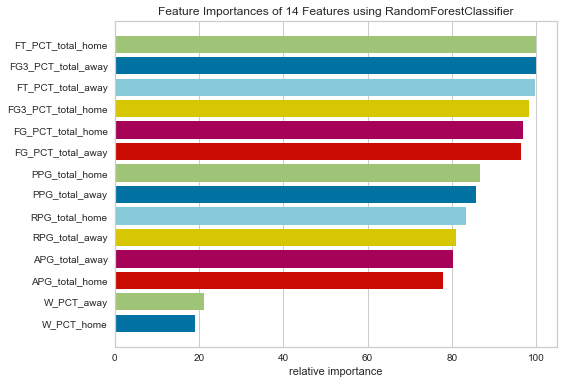

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 878, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1581
           1       0.52      0.49      0.51      1678

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



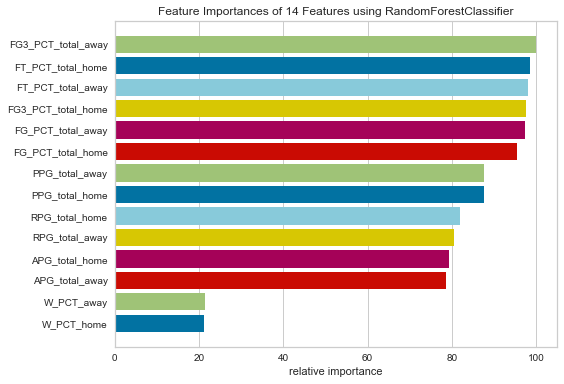

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 116, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.53      0.50      0.51      1667
           1       0.50      0.53      0.52      1592

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



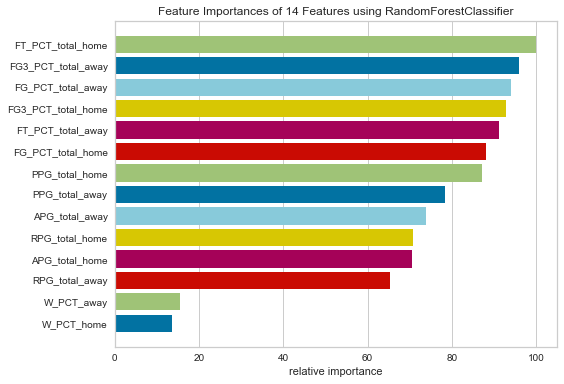

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 486, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1618
           1       0.51      0.48      0.50      1641

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



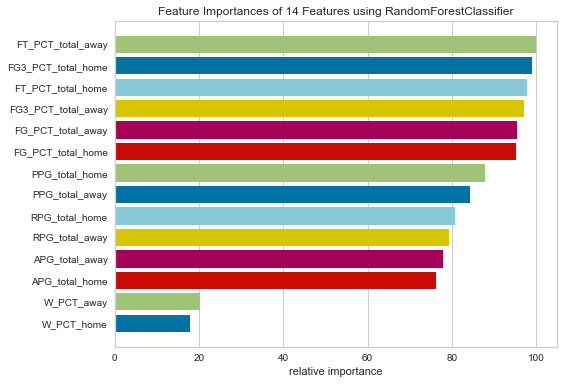

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_leaf_nodes': 900, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1627
           1       0.51      0.50      0.51      1632

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



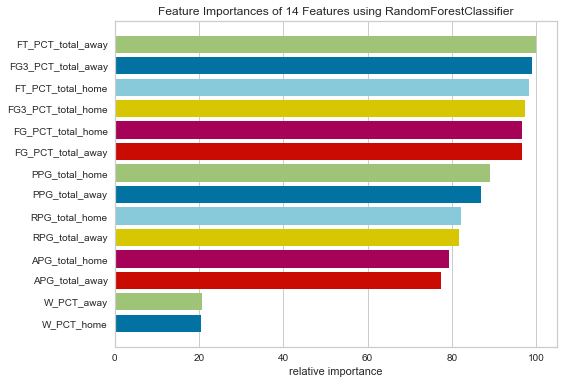

---------------------------------------------
Mean accuracy: 0.5092426447195779
Max accuracy: 0.5136544952439399
Min accuracy: 0.5035286897821417
i=15
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 154, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.49      0.51      1654
           1       0.50      0.52      0.51      1585

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



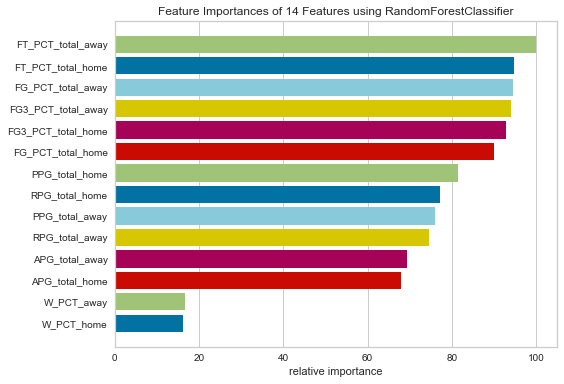

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 358, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1604
           1       0.51      0.49      0.50      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



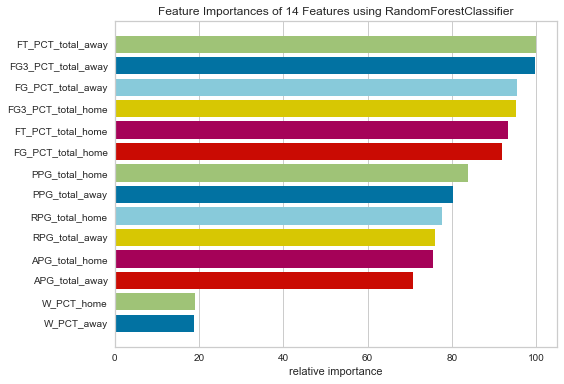

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 414, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1647
           1       0.50      0.52      0.51      1591

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



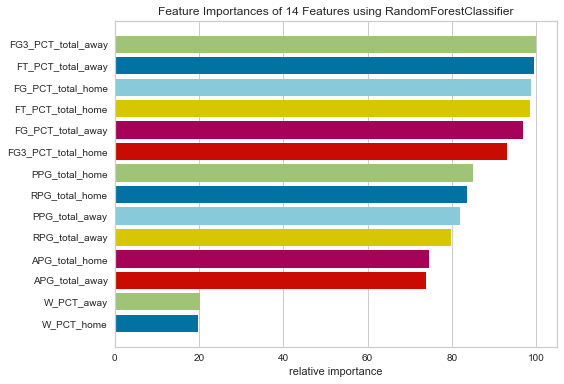

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 674, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1625
           1       0.51      0.52      0.51      1613

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



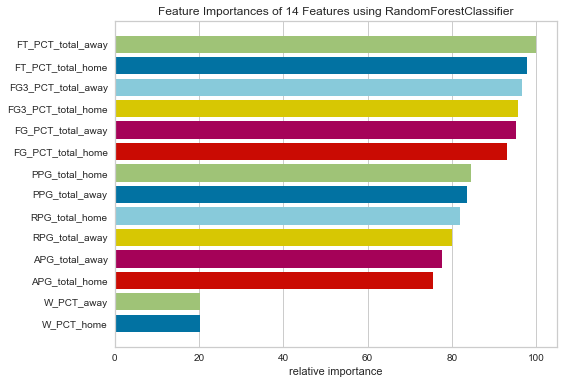

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_leaf_nodes': 710, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.54      0.51      1566
           1       0.52      0.47      0.49      1672

    accuracy                           0.50      3238
   macro avg       0.50      0.50      0.50      3238
weighted avg       0.50      0.50      0.50      3238



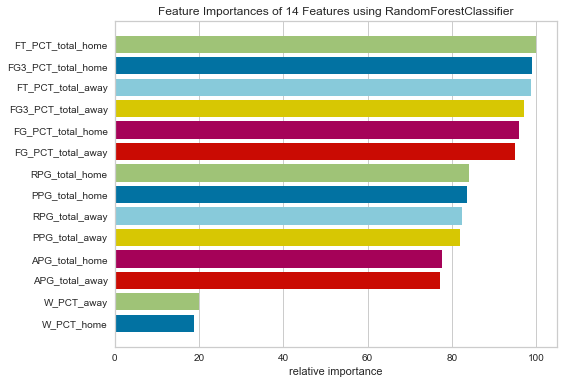

---------------------------------------------
Mean accuracy: 0.5068705006406441
Max accuracy: 0.509416486569929
Min accuracy: 0.5038592158073479
i=20
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 782, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1810
           1       0.57      0.62      0.59      1706

    accuracy                           0.59      3516
   macro avg       0.59      0.59      0.59      3516
weighted avg       0.59      0.59      0.59      3516



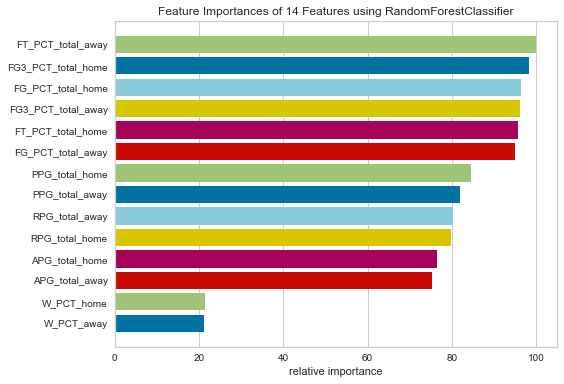

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 972, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.51      0.55      1793
           1       0.56      0.63      0.59      1722

    accuracy                           0.57      3515
   macro avg       0.58      0.57      0.57      3515
weighted avg       0.58      0.57      0.57      3515



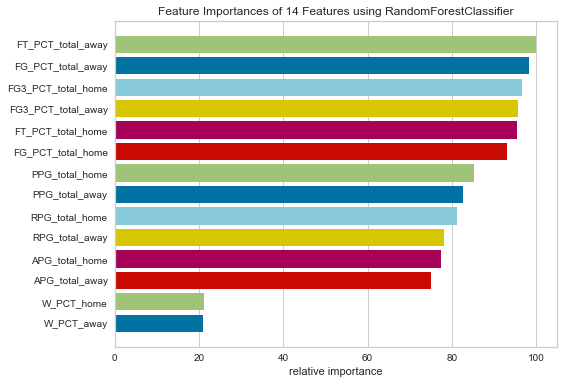

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 808, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1750
           1       0.59      0.61      0.60      1765

    accuracy                           0.59      3515
   macro avg       0.59      0.59      0.59      3515
weighted avg       0.59      0.59      0.59      3515



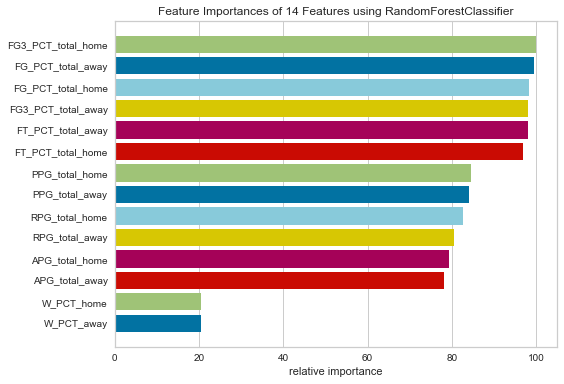

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 640, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.56      0.59      0.58      1720
           1       0.59      0.56      0.57      1795

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



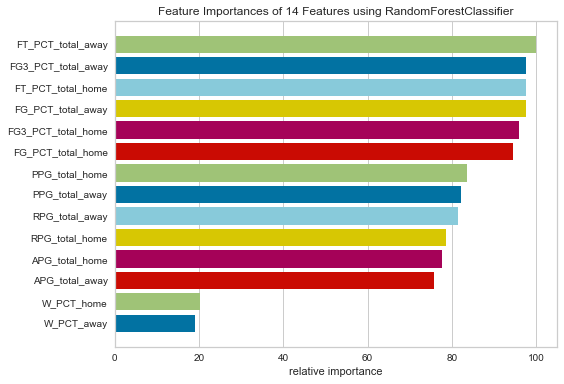

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_leaf_nodes': 742, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1715
           1       0.59      0.57      0.58      1800

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



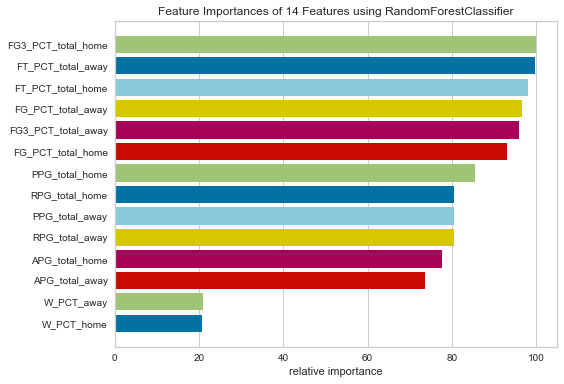

---------------------------------------------
Mean accuracy: 0.5808971221985413
Max accuracy: 0.5874822190611664
Min accuracy: 0.572972972972973
i=25
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 916, 'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.55      0.51      0.53      1739
           1       0.53      0.56      0.55      1682

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



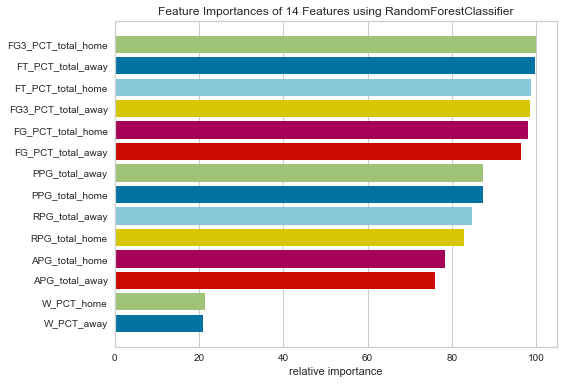

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 784, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1725
           1       0.55      0.59      0.57      1696

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



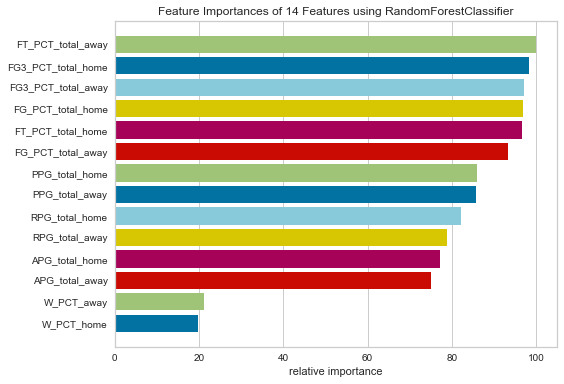

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 850, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1710
           1       0.56      0.58      0.57      1711

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



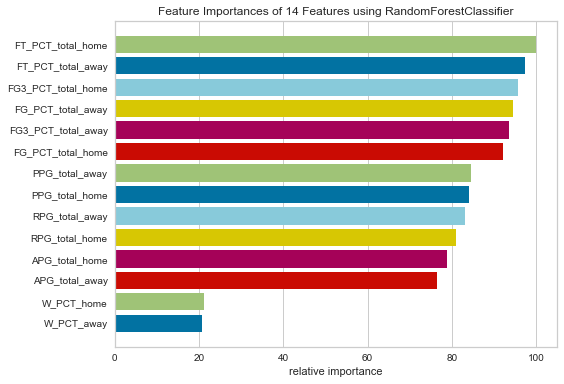

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 772, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      1668
           1       0.57      0.54      0.56      1753

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



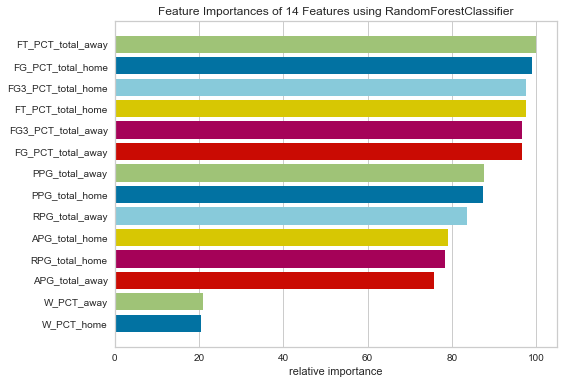

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_leaf_nodes': 794, 'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      1710
           1       0.53      0.55      0.54      1710

    accuracy                           0.54      3420
   macro avg       0.54      0.54      0.54      3420
weighted avg       0.54      0.54      0.54      3420



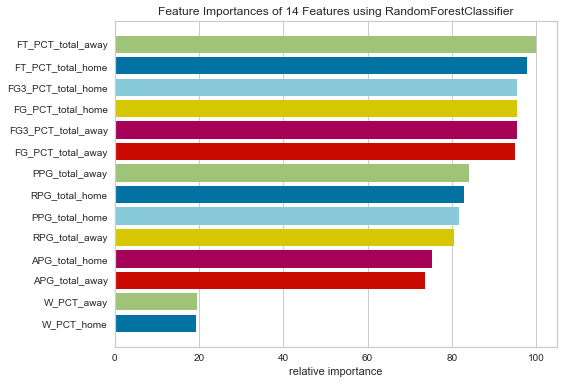

---------------------------------------------
Mean accuracy: 0.5520315697164572
Max accuracy: 0.5609470914937152
Min accuracy: 0.5363928675825782


In [29]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_leaf_nodes': [*range(4,1000,2)],
    'criterion': ['gini', 'entropy'],
})

## Try prune max features

i=0
WINNER:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      1928
           1       0.65      0.74      0.69      1882

    accuracy                           0.67      3810
   macro avg       0.68      0.67      0.67      3810
weighted avg       0.68      0.67      0.67      3810



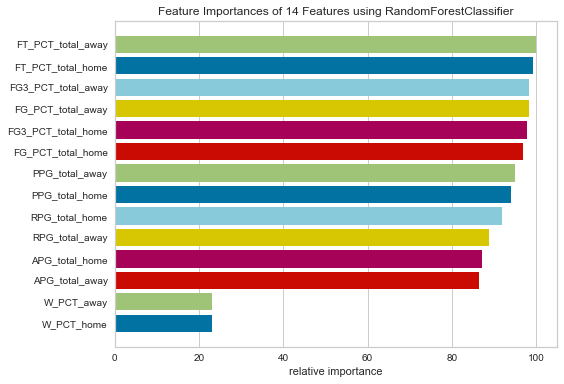

---------------------------------------------
i=1
WINNER:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.67      0.61      0.64      1884
           1       0.65      0.71      0.68      1926

    accuracy                           0.66      3810
   macro avg       0.66      0.66      0.66      3810
weighted avg       0.66      0.66      0.66      3810



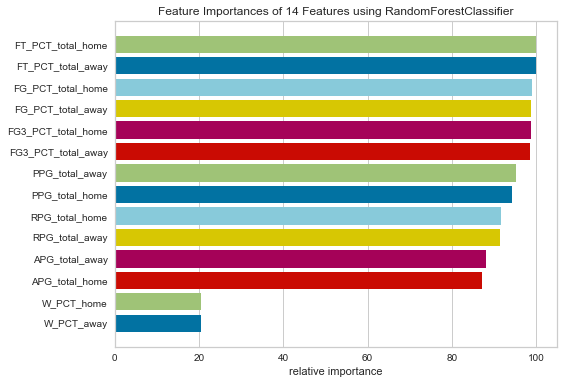

---------------------------------------------
i=2
WINNER:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.61      0.64      1934
           1       0.64      0.71      0.67      1876

    accuracy                           0.66      3810
   macro avg       0.66      0.66      0.66      3810
weighted avg       0.66      0.66      0.66      3810



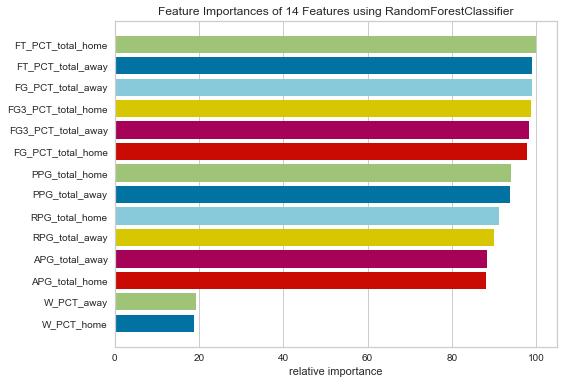

---------------------------------------------
i=3
WINNER:

Best Random Forest accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1855
           1       0.66      0.66      0.66      1954

    accuracy                           0.65      3809
   macro avg       0.65      0.65      0.65      3809
weighted avg       0.65      0.65      0.65      3809



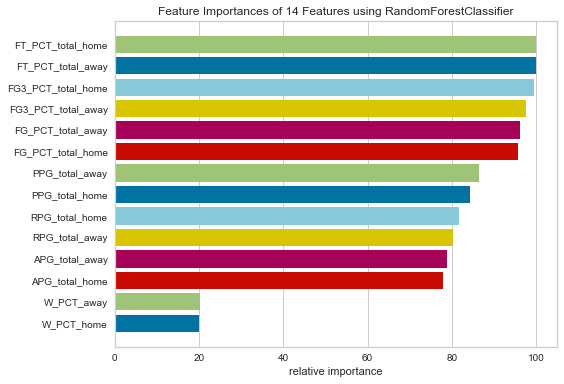

---------------------------------------------
i=4
WINNER:

Best Random Forest accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      1923
           1       0.66      0.72      0.68      1886

    accuracy                           0.67      3809
   macro avg       0.68      0.67      0.67      3809
weighted avg       0.68      0.67      0.67      3809



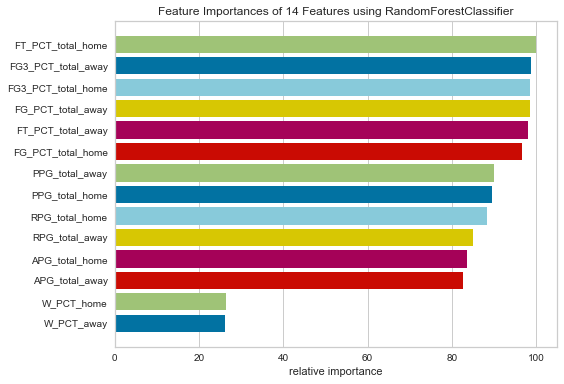

---------------------------------------------
Mean accuracy: 0.660147588698958
Max accuracy: 0.6724409448818898
Min accuracy: 0.6492517721186664
i=5
FGP:

Best Random Forest accuracy ({'max_features': 2, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1777
           1       0.59      0.62      0.60      1777

    accuracy                           0.59      3554
   macro avg       0.59      0.59      0.59      3554
weighted avg       0.59      0.59      0.59      3554



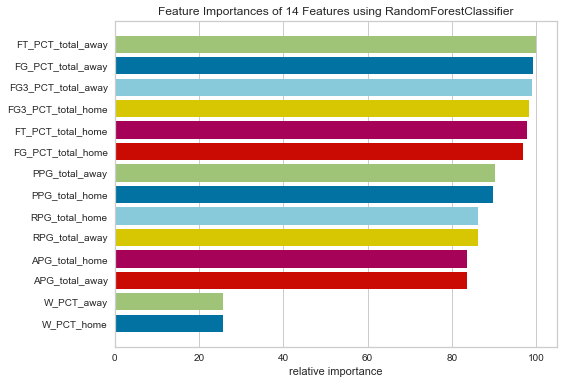

---------------------------------------------
i=6
FGP:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.57      0.58      1795
           1       0.57      0.58      0.58      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



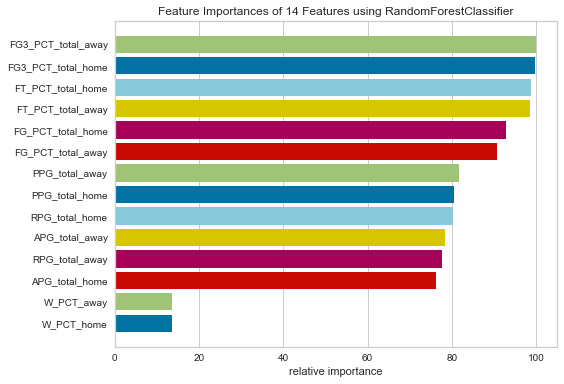

---------------------------------------------
i=7
FGP:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1785
           1       0.58      0.62      0.60      1769

    accuracy                           0.59      3554
   macro avg       0.59      0.59      0.59      3554
weighted avg       0.59      0.59      0.59      3554



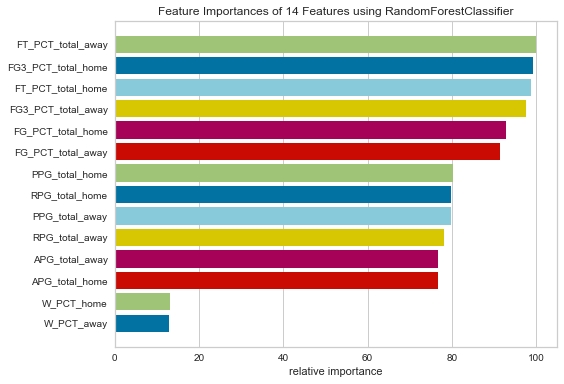

---------------------------------------------
i=8
FGP:

Best Random Forest accuracy ({'max_features': 9, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      1743
           1       0.59      0.61      0.60      1810

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



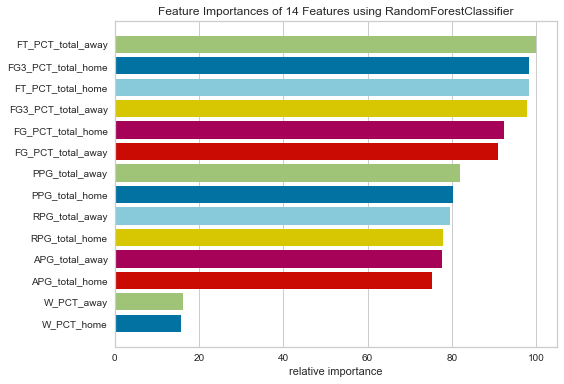

---------------------------------------------
i=9
FGP:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.55      0.57      1784
           1       0.58      0.61      0.59      1769

    accuracy                           0.58      3553
   macro avg       0.58      0.58      0.58      3553
weighted avg       0.58      0.58      0.58      3553



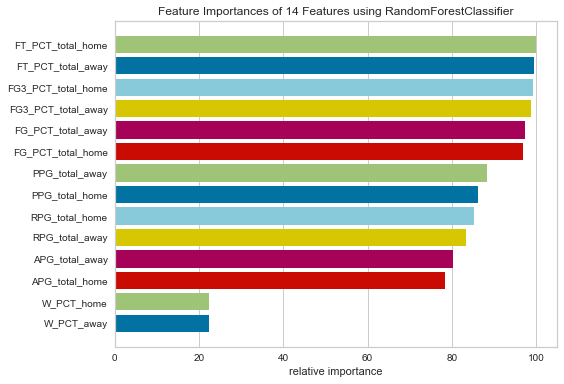

---------------------------------------------
Mean accuracy: 0.586915362844591
Max accuracy: 0.5928531232414181
Min accuracy: 0.578503095104108
i=10
FG3:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1655
           1       0.50      0.52      0.51      1605

    accuracy                           0.51      3260
   macro avg       0.51      0.51      0.51      3260
weighted avg       0.51      0.51      0.51      3260



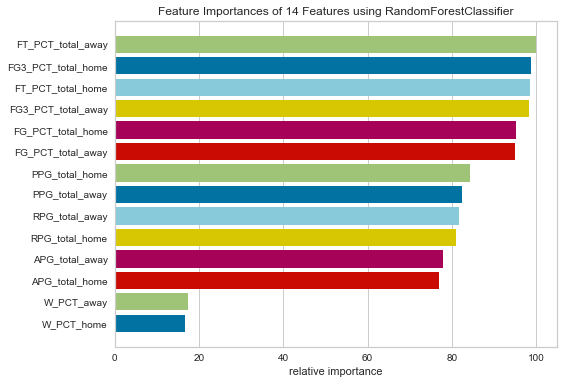

---------------------------------------------
i=11
FG3:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.54      0.51      1581
           1       0.52      0.46      0.49      1678

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



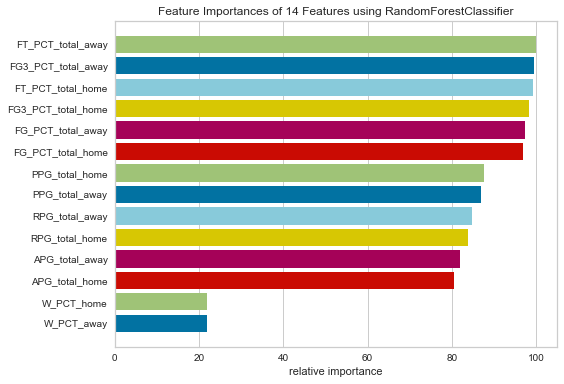

---------------------------------------------
i=12
FG3:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.54      0.54      1667
           1       0.51      0.50      0.51      1592

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



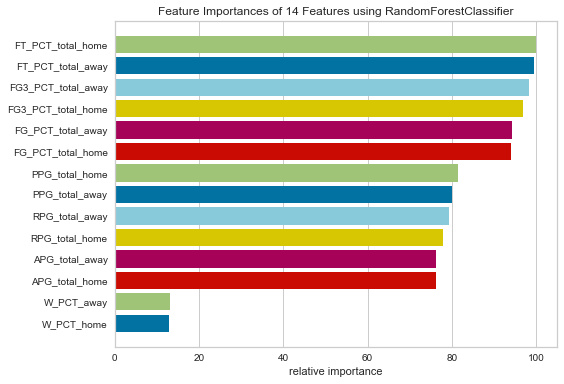

---------------------------------------------
i=13
FG3:

Best Random Forest accuracy ({'max_features': 8, 'criterion': 'entropy'}): 0.49
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      1618
           1       0.49      0.46      0.47      1641

    accuracy                           0.49      3259
   macro avg       0.49      0.49      0.49      3259
weighted avg       0.49      0.49      0.49      3259



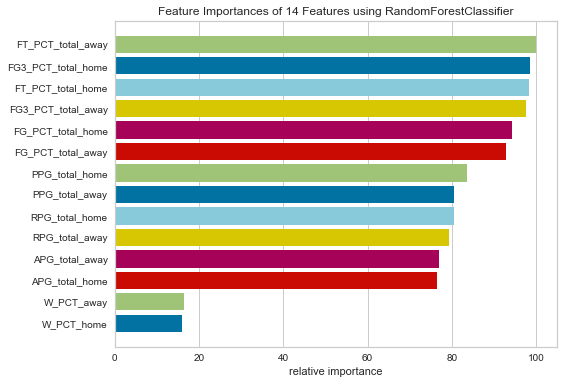

---------------------------------------------
i=14
FG3:

Best Random Forest accuracy ({'max_features': 3, 'criterion': 'gini'}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1627
           1       0.53      0.50      0.51      1632

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



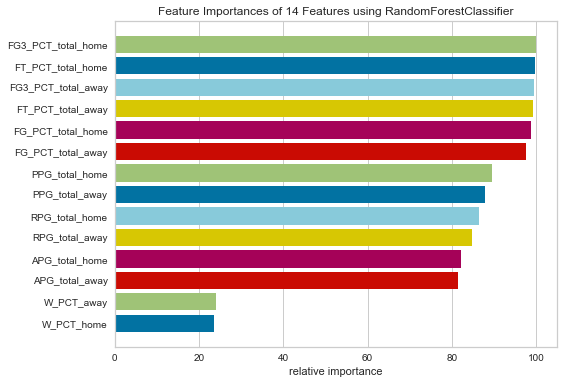

---------------------------------------------
Mean accuracy: 0.5049473661422733
Max accuracy: 0.523166615526235
Min accuracy: 0.49125498619208346
i=15
FT:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      1654
           1       0.50      0.49      0.49      1585

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



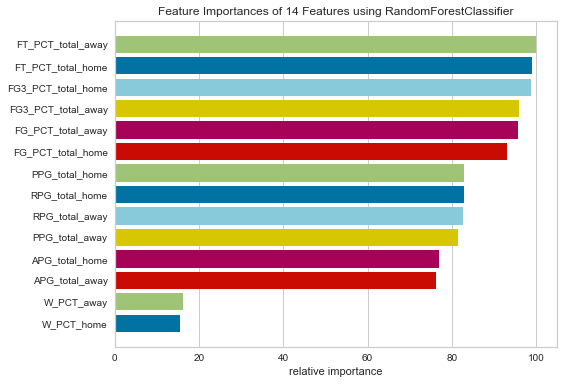

---------------------------------------------
i=16
FT:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.53      0.52      1604
           1       0.51      0.49      0.50      1635

    accuracy                           0.51      3239
   macro avg       0.51      0.51      0.51      3239
weighted avg       0.51      0.51      0.51      3239



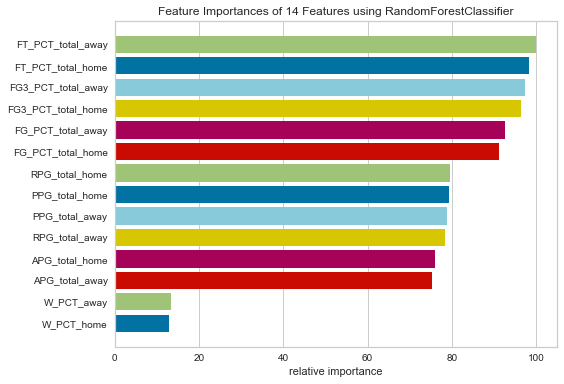

---------------------------------------------
i=17
FT:

Best Random Forest accuracy ({'max_features': 'log2', 'criterion': 'gini'}): 0.51
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1647
           1       0.50      0.49      0.50      1591

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



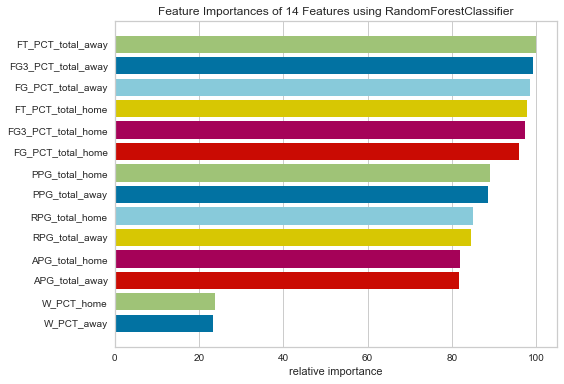

---------------------------------------------
i=18
FT:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      1625
           1       0.52      0.50      0.51      1613

    accuracy                           0.52      3238
   macro avg       0.52      0.52      0.52      3238
weighted avg       0.52      0.52      0.52      3238



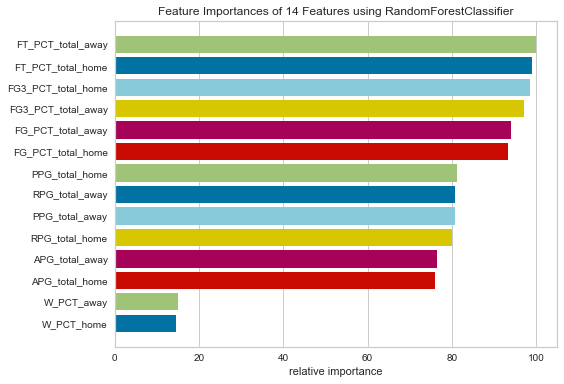

---------------------------------------------
i=19
FT:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.49      0.56      0.52      1566
           1       0.52      0.45      0.49      1672

    accuracy                           0.50      3238
   macro avg       0.51      0.51      0.50      3238
weighted avg       0.51      0.50      0.50      3238



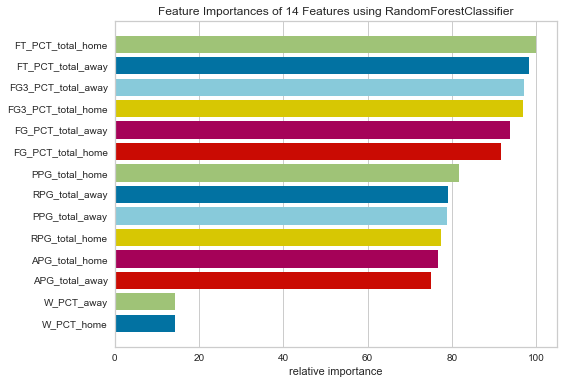

---------------------------------------------
Mean accuracy: 0.5105762297859567
Max accuracy: 0.5166769610870908
Min accuracy: 0.5078728002469898
i=20
AST:

Best Random Forest accuracy ({'max_features': 11, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1810
           1       0.57      0.61      0.59      1706

    accuracy                           0.59      3516
   macro avg       0.59      0.59      0.59      3516
weighted avg       0.59      0.59      0.59      3516



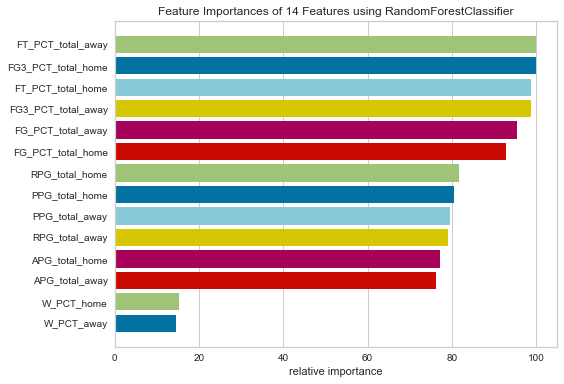

---------------------------------------------
i=21
AST:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.53      0.57      1793
           1       0.57      0.64      0.60      1722

    accuracy                           0.59      3515
   macro avg       0.59      0.59      0.59      3515
weighted avg       0.59      0.59      0.59      3515



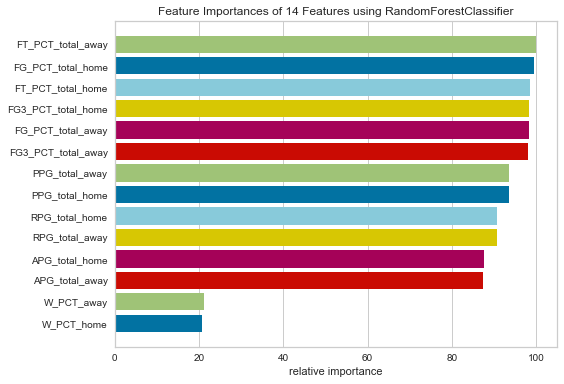

---------------------------------------------
i=22
AST:

Best Random Forest accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1750
           1       0.59      0.61      0.60      1765

    accuracy                           0.59      3515
   macro avg       0.59      0.59      0.59      3515
weighted avg       0.59      0.59      0.59      3515



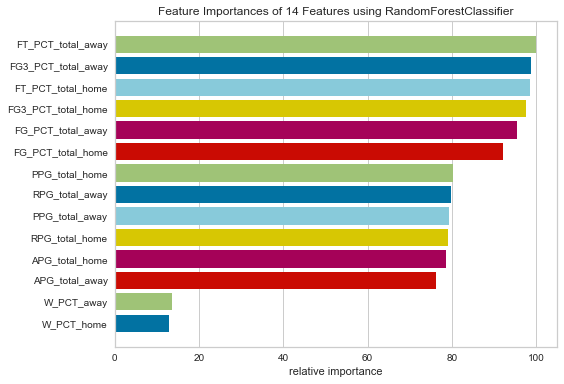

---------------------------------------------
i=23
AST:

Best Random Forest accuracy ({'max_features': 1, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1720
           1       0.59      0.58      0.58      1795

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



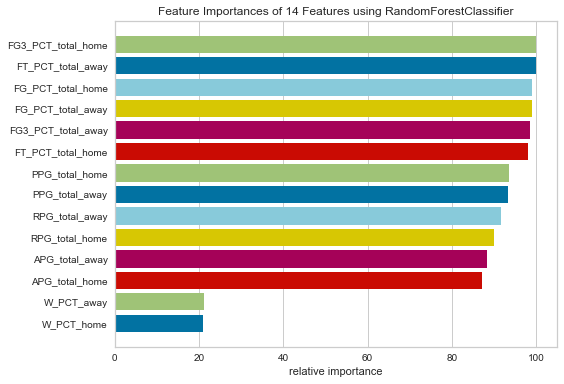

---------------------------------------------
i=24
AST:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.59      0.58      1715
           1       0.60      0.58      0.59      1800

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



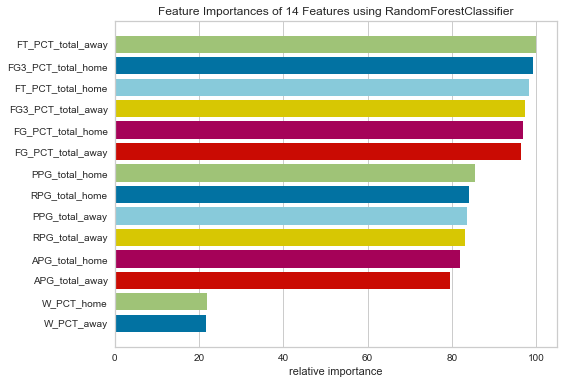

---------------------------------------------
Mean accuracy: 0.5864446739716185
Max accuracy: 0.591180654338549
Min accuracy: 0.579800853485064
i=25
REB:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1739
           1       0.54      0.58      0.56      1682

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



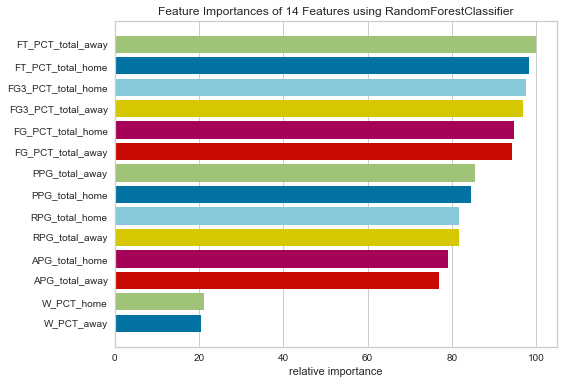

---------------------------------------------
i=26
REB:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.55      0.56      1725
           1       0.55      0.57      0.56      1696

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



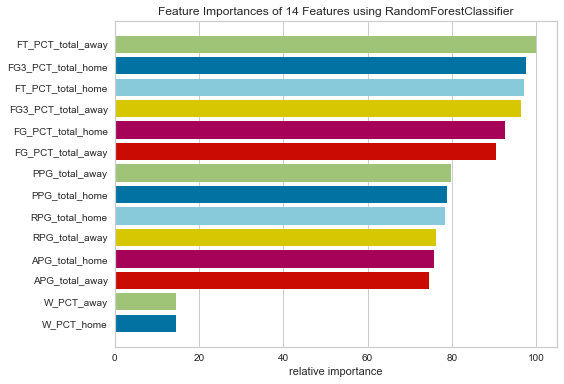

---------------------------------------------
i=27
REB:

Best Random Forest accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1710
           1       0.56      0.56      0.56      1711

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



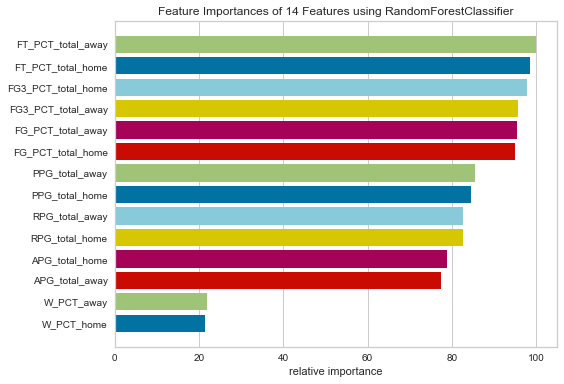

---------------------------------------------
i=28
REB:

Best Random Forest accuracy ({'max_features': 9, 'criterion': 'entropy'}): 0.54
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      1668
           1       0.56      0.54      0.55      1753

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



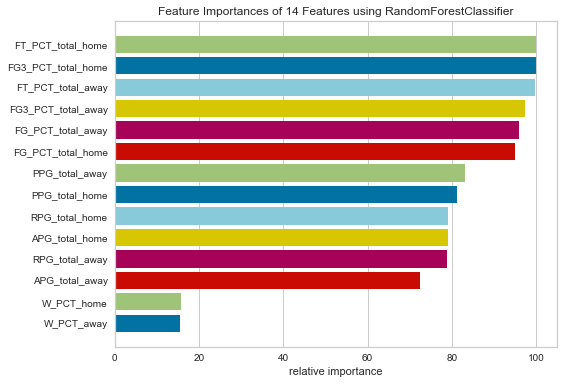

---------------------------------------------
i=29
REB:

Best Random Forest accuracy ({'max_features': 10, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.55      0.55      1710
           1       0.56      0.56      0.56      1710

    accuracy                           0.56      3420
   macro avg       0.56      0.56      0.56      3420
weighted avg       0.56      0.56      0.56      3420



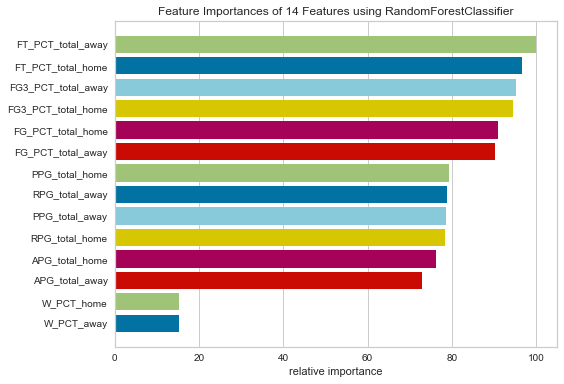

---------------------------------------------
Mean accuracy: 0.5515200233849751
Max accuracy: 0.5580239695995323
Min accuracy: 0.5422391113709442


In [30]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
})

## Try class weight balance

i=0


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      1928
           1       0.64      0.71      0.68      1882

    accuracy                           0.66      3810
   macro avg       0.67      0.66      0.66      3810
weighted avg       0.67      0.66      0.66      3810



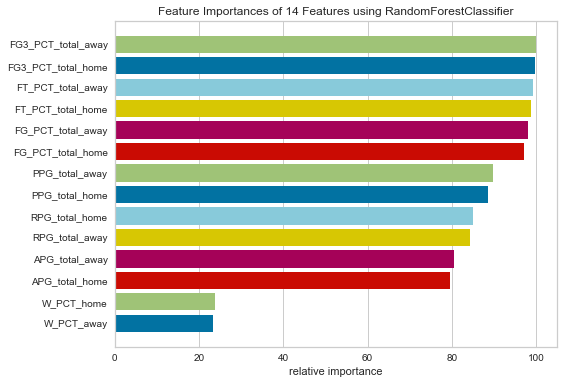

---------------------------------------------
i=1


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.67
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1884
           1       0.66      0.71      0.68      1926

    accuracy                           0.67      3810
   macro avg       0.67      0.67      0.67      3810
weighted avg       0.67      0.67      0.67      3810



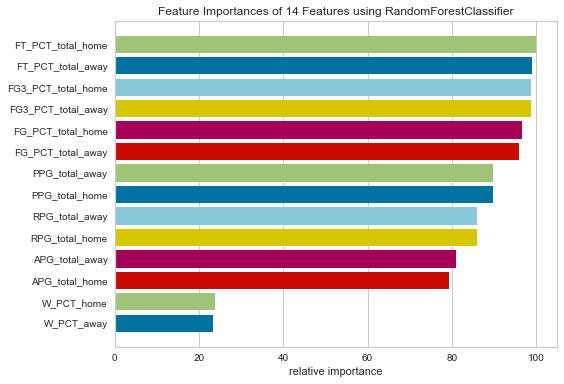

---------------------------------------------
i=2


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.67
              precision    recall  f1-score   support

           0       0.69      0.62      0.66      1934
           1       0.65      0.72      0.68      1876

    accuracy                           0.67      3810
   macro avg       0.67      0.67      0.67      3810
weighted avg       0.67      0.67      0.67      3810



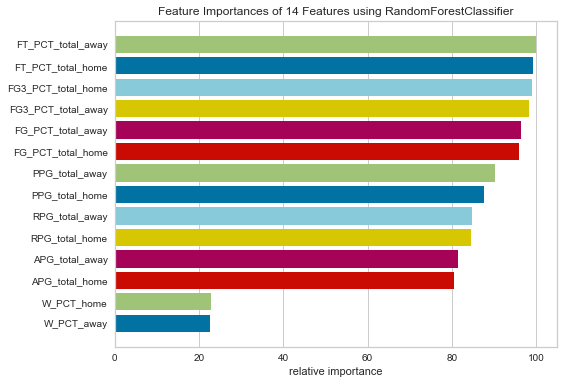

---------------------------------------------
i=3


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.65
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1855
           1       0.66      0.66      0.66      1954

    accuracy                           0.65      3809
   macro avg       0.65      0.65      0.65      3809
weighted avg       0.65      0.65      0.65      3809



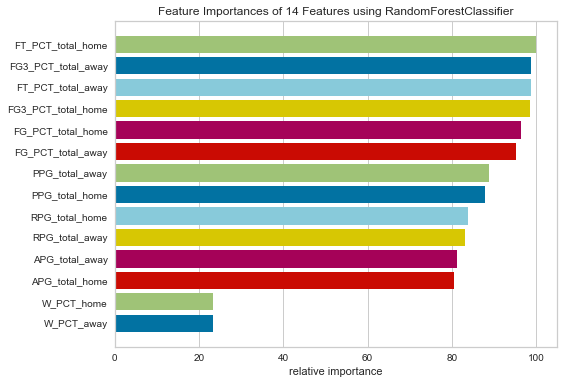

---------------------------------------------
i=4


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1923
           1       0.65      0.69      0.67      1886

    accuracy                           0.66      3809
   macro avg       0.66      0.66      0.66      3809
weighted avg       0.66      0.66      0.66      3809



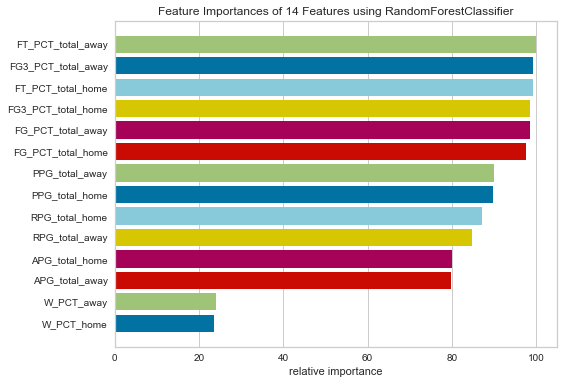

---------------------------------------------
Mean accuracy: 0.662772467336306
Max accuracy: 0.668503937007874
Min accuracy: 0.6524022053032292
i=5


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.57      0.59      1777
           1       0.59      0.62      0.60      1777

    accuracy                           0.60      3554
   macro avg       0.60      0.60      0.60      3554
weighted avg       0.60      0.60      0.60      3554



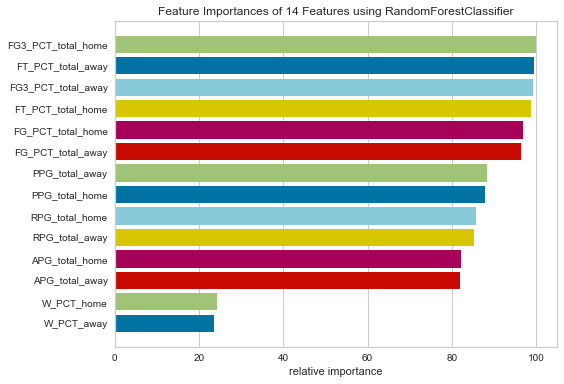

---------------------------------------------
i=6


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      1795
           1       0.58      0.61      0.59      1759

    accuracy                           0.58      3554
   macro avg       0.58      0.58      0.58      3554
weighted avg       0.58      0.58      0.58      3554



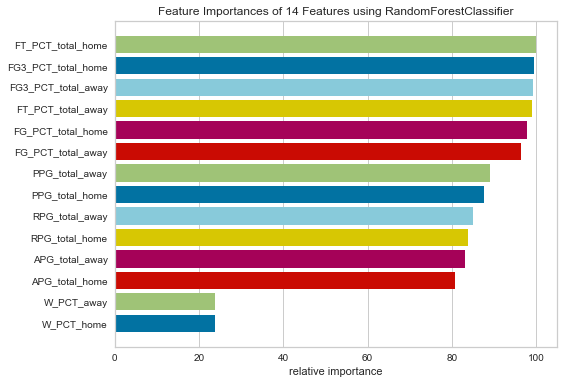

---------------------------------------------
i=7


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1785
           1       0.59      0.62      0.60      1769

    accuracy                           0.59      3554
   macro avg       0.59      0.59      0.59      3554
weighted avg       0.59      0.59      0.59      3554



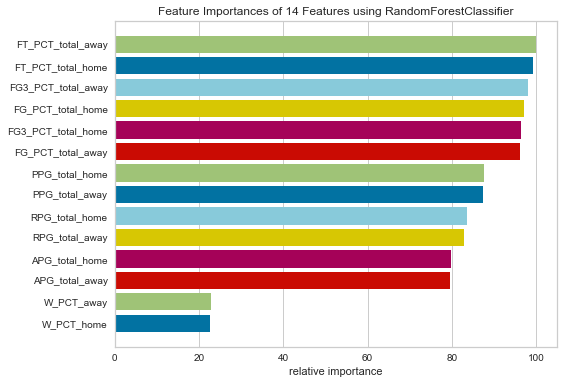

---------------------------------------------
i=8


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1743
           1       0.60      0.62      0.61      1810

    accuracy                           0.60      3553
   macro avg       0.60      0.60      0.60      3553
weighted avg       0.60      0.60      0.60      3553



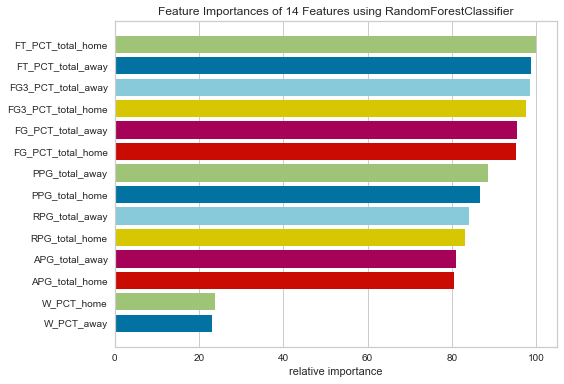

---------------------------------------------
i=9


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.56      0.58      1784
           1       0.58      0.61      0.59      1769

    accuracy                           0.59      3553
   macro avg       0.59      0.59      0.59      3553
weighted avg       0.59      0.59      0.59      3553



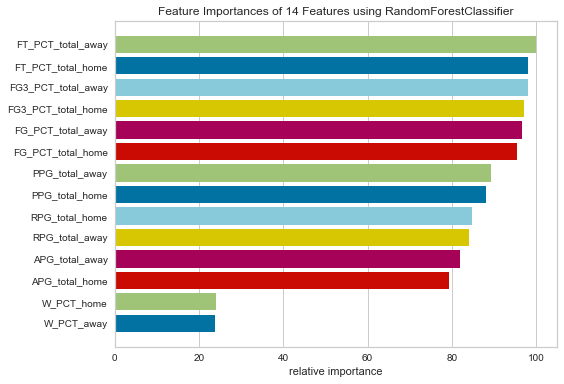

---------------------------------------------
Mean accuracy: 0.5928951747799738
Max accuracy: 0.5978046721080776
Min accuracy: 0.584411930219471
i=10


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1655
           1       0.49      0.51      0.50      1605

    accuracy                           0.50      3260
   macro avg       0.50      0.50      0.50      3260
weighted avg       0.50      0.50      0.50      3260



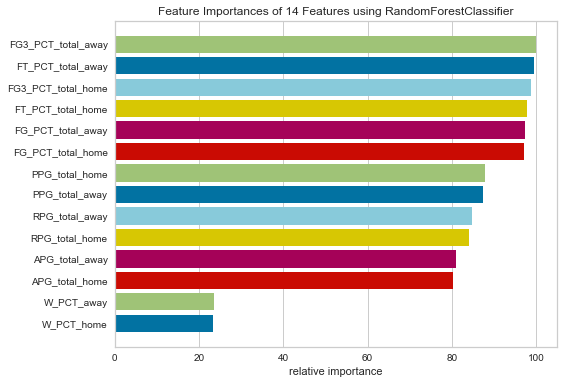

---------------------------------------------
i=11


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.51
              precision    recall  f1-score   support

           0       0.49      0.54      0.52      1581
           1       0.52      0.47      0.50      1678

    accuracy                           0.51      3259
   macro avg       0.51      0.51      0.51      3259
weighted avg       0.51      0.51      0.51      3259



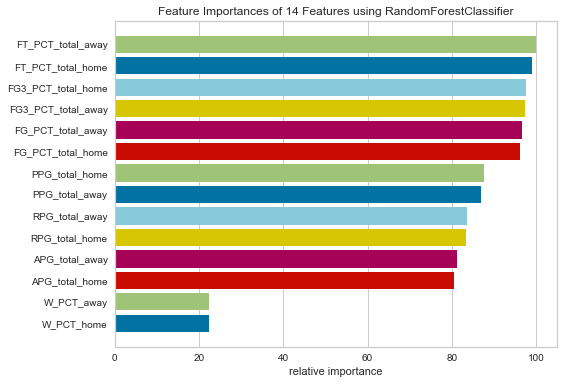

---------------------------------------------
i=12


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.52      0.52      1667
           1       0.51      0.52      0.51      1592

    accuracy                           0.52      3259
   macro avg       0.52      0.52      0.52      3259
weighted avg       0.52      0.52      0.52      3259



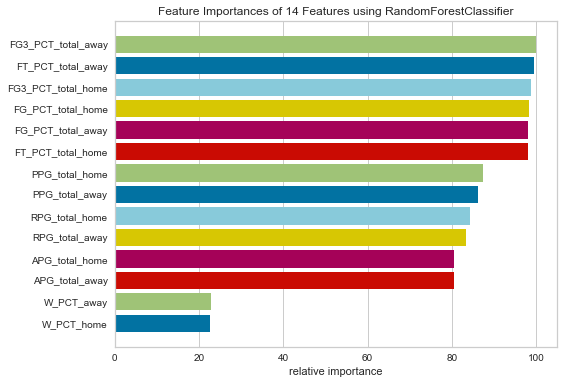

---------------------------------------------
i=13


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.53      0.51      1618
           1       0.50      0.47      0.49      1641

    accuracy                           0.50      3259
   macro avg       0.50      0.50      0.50      3259
weighted avg       0.50      0.50      0.50      3259



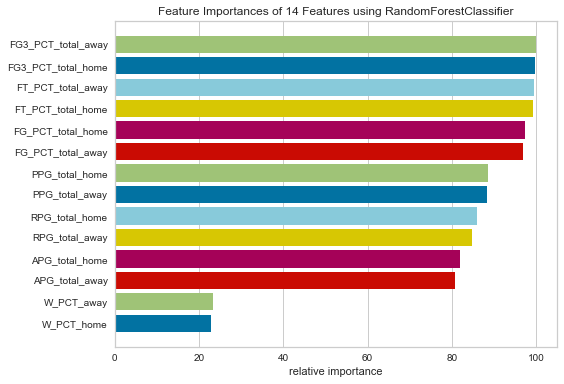

---------------------------------------------
i=14


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.53
              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1627
           1       0.53      0.50      0.51      1632

    accuracy                           0.53      3259
   macro avg       0.53      0.53      0.53      3259
weighted avg       0.53      0.53      0.53      3259



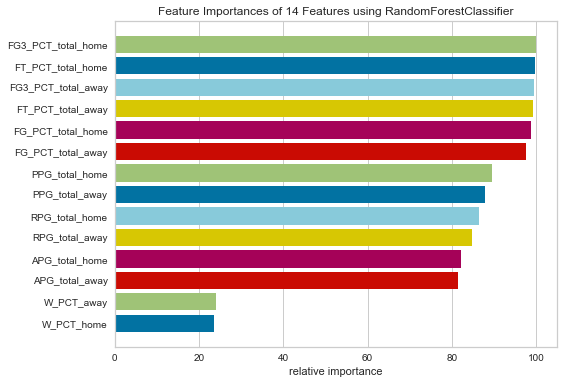

---------------------------------------------
Mean accuracy: 0.5060984964713102
Max accuracy: 0.5173366063209573
Min accuracy: 0.49953973611537283
i=15


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.52
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      1654
           1       0.51      0.49      0.50      1585

    accuracy                           0.52      3239
   macro avg       0.52      0.52      0.52      3239
weighted avg       0.52      0.52      0.52      3239



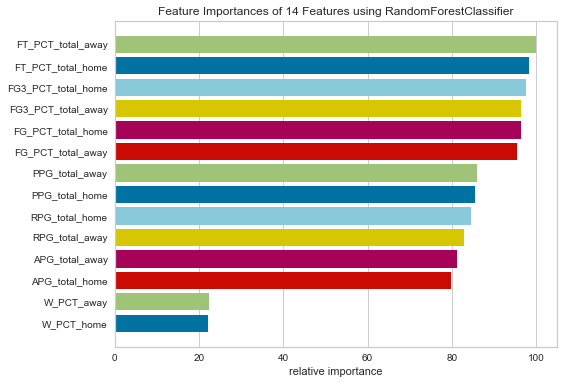

---------------------------------------------
i=16


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.50
              precision    recall  f1-score   support

           0       0.50      0.54      0.52      1604
           1       0.51      0.47      0.49      1635

    accuracy                           0.50      3239
   macro avg       0.50      0.50      0.50      3239
weighted avg       0.50      0.50      0.50      3239



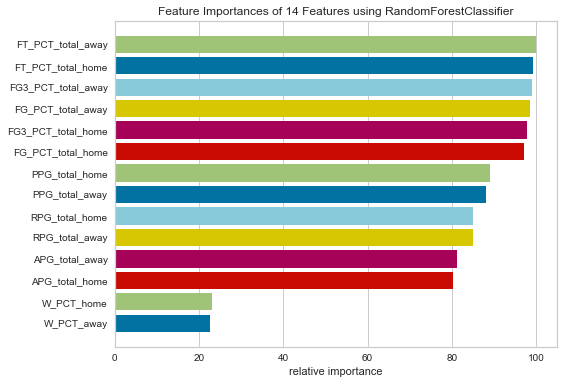

---------------------------------------------
i=17


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.50
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1647
           1       0.50      0.50      0.50      1591

    accuracy                           0.50      3238
   macro avg       0.50      0.50      0.50      3238
weighted avg       0.50      0.50      0.50      3238



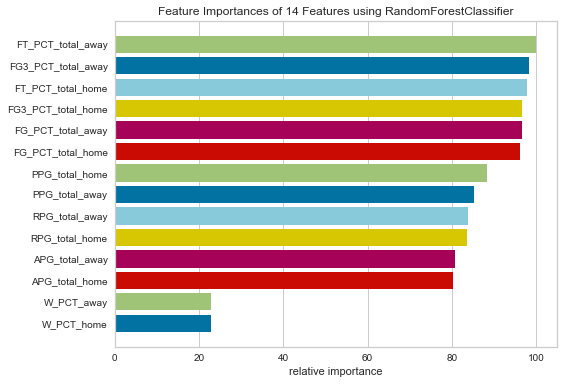

---------------------------------------------
i=18


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.51
              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1625
           1       0.51      0.50      0.51      1613

    accuracy                           0.51      3238
   macro avg       0.51      0.51      0.51      3238
weighted avg       0.51      0.51      0.51      3238



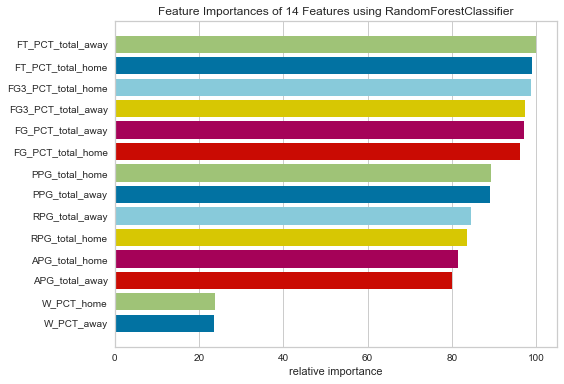

---------------------------------------------
i=19


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.51
              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1566
           1       0.54      0.45      0.49      1672

    accuracy                           0.51      3238
   macro avg       0.52      0.52      0.51      3238
weighted avg       0.52      0.51      0.51      3238



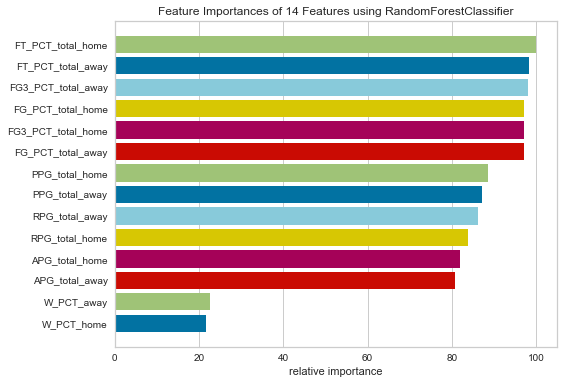

---------------------------------------------
Mean accuracy: 0.5098808796666476
Max accuracy: 0.5196048163013276
Min accuracy: 0.5032417412781722
i=20


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1810
           1       0.57      0.61      0.59      1706

    accuracy                           0.59      3516
   macro avg       0.59      0.59      0.59      3516
weighted avg       0.59      0.59      0.59      3516



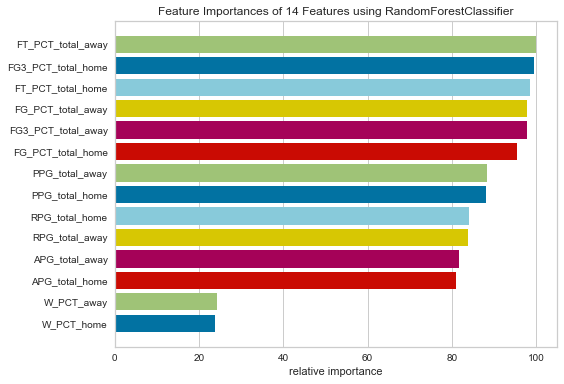

---------------------------------------------
i=21


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1793
           1       0.57      0.61      0.59      1722

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



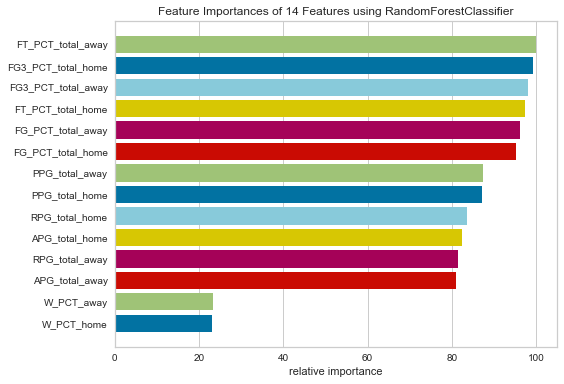

---------------------------------------------
i=22


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.58
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1750
           1       0.58      0.60      0.59      1765

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



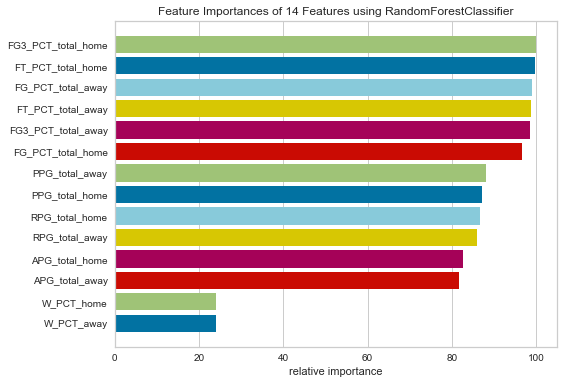

---------------------------------------------
i=23


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1720
           1       0.59      0.59      0.59      1795

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



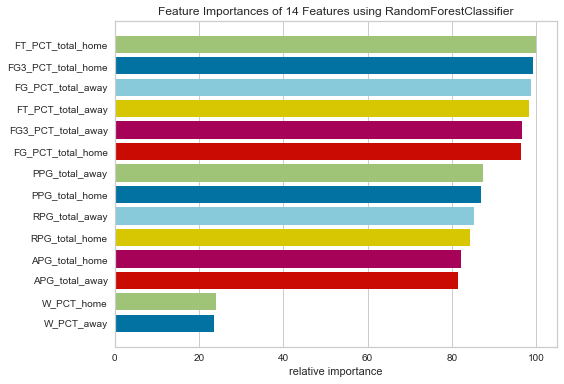

---------------------------------------------
i=24


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.58
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1715
           1       0.59      0.59      0.59      1800

    accuracy                           0.58      3515
   macro avg       0.58      0.58      0.58      3515
weighted avg       0.58      0.58      0.58      3515



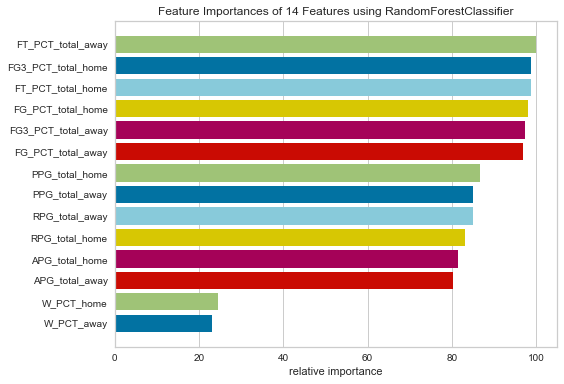

---------------------------------------------
Mean accuracy: 0.5833863727208437
Max accuracy: 0.5875995449374289
Min accuracy: 0.5817923186344239
i=25


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.54      0.55      1739
           1       0.55      0.58      0.56      1682

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



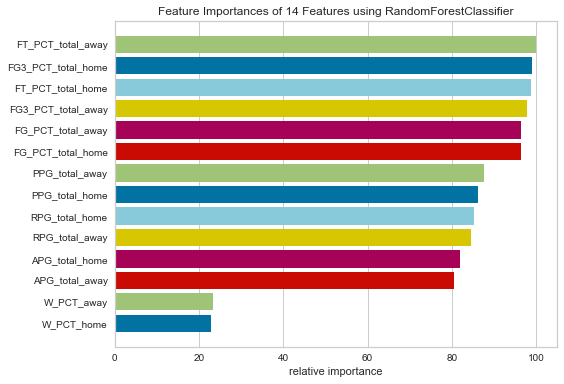

---------------------------------------------
i=26


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.56
              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1725
           1       0.55      0.59      0.57      1696

    accuracy                           0.56      3421
   macro avg       0.56      0.56      0.56      3421
weighted avg       0.56      0.56      0.56      3421



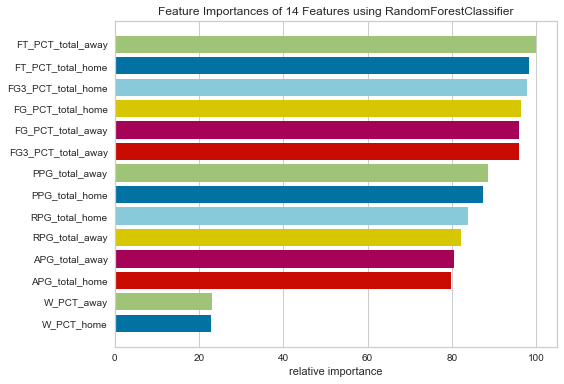

---------------------------------------------
i=27


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.54      0.55      1710
           1       0.55      0.57      0.56      1711

    accuracy                           0.55      3421
   macro avg       0.55      0.55      0.55      3421
weighted avg       0.55      0.55      0.55      3421



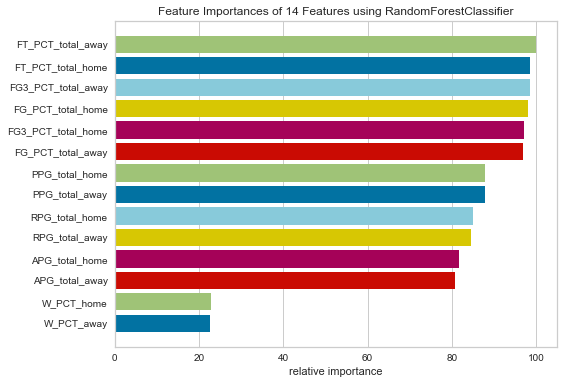

---------------------------------------------
i=28


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.54
              precision    recall  f1-score   support

           0       0.53      0.56      0.54      1668
           1       0.56      0.53      0.54      1753

    accuracy                           0.54      3421
   macro avg       0.54      0.54      0.54      3421
weighted avg       0.54      0.54      0.54      3421



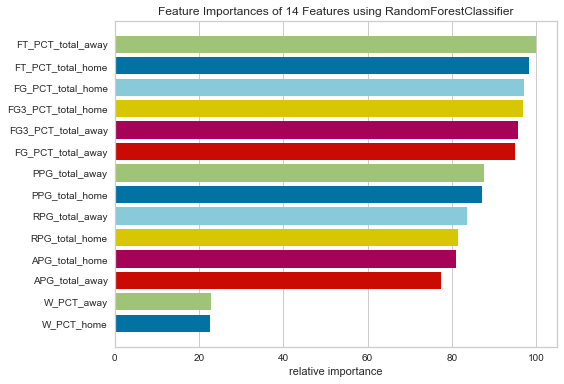

---------------------------------------------
i=29


C:\Users\prabj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best Random Forest accuracy ({'criterion': 'gini', 'class_weight': None}): 0.55
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1710
           1       0.55      0.56      0.55      1710

    accuracy                           0.55      3420
   macro avg       0.55      0.55      0.55      3420
weighted avg       0.55      0.55      0.55      3420



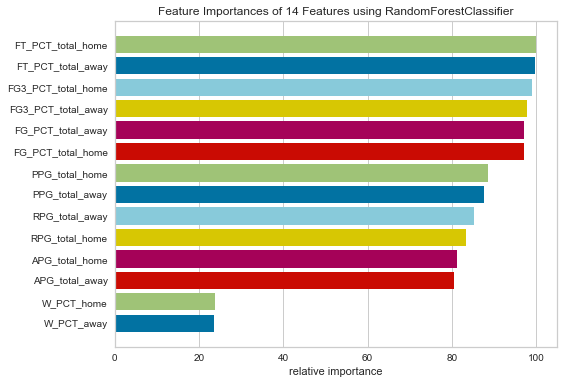

---------------------------------------------
Mean accuracy: 0.5529815843320667
Max accuracy: 0.5591932183572055
Min accuracy: 0.541069862613271


In [31]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
})